# Income
In this notebook the correlation between the income and race as well as several intersting factors (year of immigration, citizenship status, occupation) is analysed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain, product
import json

In [2]:
data_path = r'../../data/cps_clean_original_races.csv'
race_occ_path = r'../../data/race_codes.txt'
yrimmig_2023_path = r'../../data/yrimmig_codes_2023.csv'
citizenship_path = r'../../data/citizenship_codes.csv'
occ2010_data_path = r'../../data/occ2010_codes.txt'

In [3]:
data_df = pd.read_csv(data_path, sep=';')

race_codes_df = pd.read_csv(race_occ_path, sep=';')

yrimmig_2023 = pd.read_csv(yrimmig_2023_path, sep=';')
citizenship_codes_df = pd.read_csv(citizenship_path, sep=';')

occ2010_df = pd.read_csv(occ2010_data_path, sep='                ', header=None)
occ2010_df.columns = ['Code', 'occ_title']

C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\1376174312.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  occ2010_df = pd.read_csv(occ2010_data_path, sep='                ', header=None)


Since some people did not immigrate to the U.S., their year of immigration is considered null. These values are replaced with 0 for further analysis.

In [4]:
data_df['YRIMMIG'].fillna(0, inplace=True)

In [5]:
data_df['YRIMMIG'] = data_df['YRIMMIG'].astype('int64')

The top 5 largest races according to this dataset are 100, 200, 651, 300, 801. For some aspects the focus lies on these race groups only.

In [6]:
top_5_races = [100, 200, 651, 300, 801]

In [7]:
# How to calculate weighted average in pandas? geeksforgeeks.org
def weighed_avg_income(df, value, weight):
    val = df[value]
    wt = df[weight]

    return (val * wt).sum() / wt.sum()

----
## Does the average income differ for different races?
- INCWAGE
- RACE
- ASECWT
- YRIMMIG (year of immigration)
- CITIZEN (citizenship status)

In [8]:
income_races = data_df[['RACE', 'INCWAGE', 'YEAR', 'ASECWT']]
income_races = income_races.merge(race_codes_df, on='RACE')

### over all years

In [9]:
# unweighed
# avg_incomes = income_races.groupby(['race_title'])['INCWAGE'].mean().reset_index().sort_values('INCWAGE', ascending=False)

In [10]:
# weighed
avg_incomes = income_races.groupby(['race_title']).apply(weighed_avg_income, 'INCWAGE', 'ASECWT').reset_index()
avg_incomes.columns = ['race_title', 'INCWAGE']
avg_incomes.sort_values('INCWAGE', ascending=False, inplace=True)

C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\3021562506.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


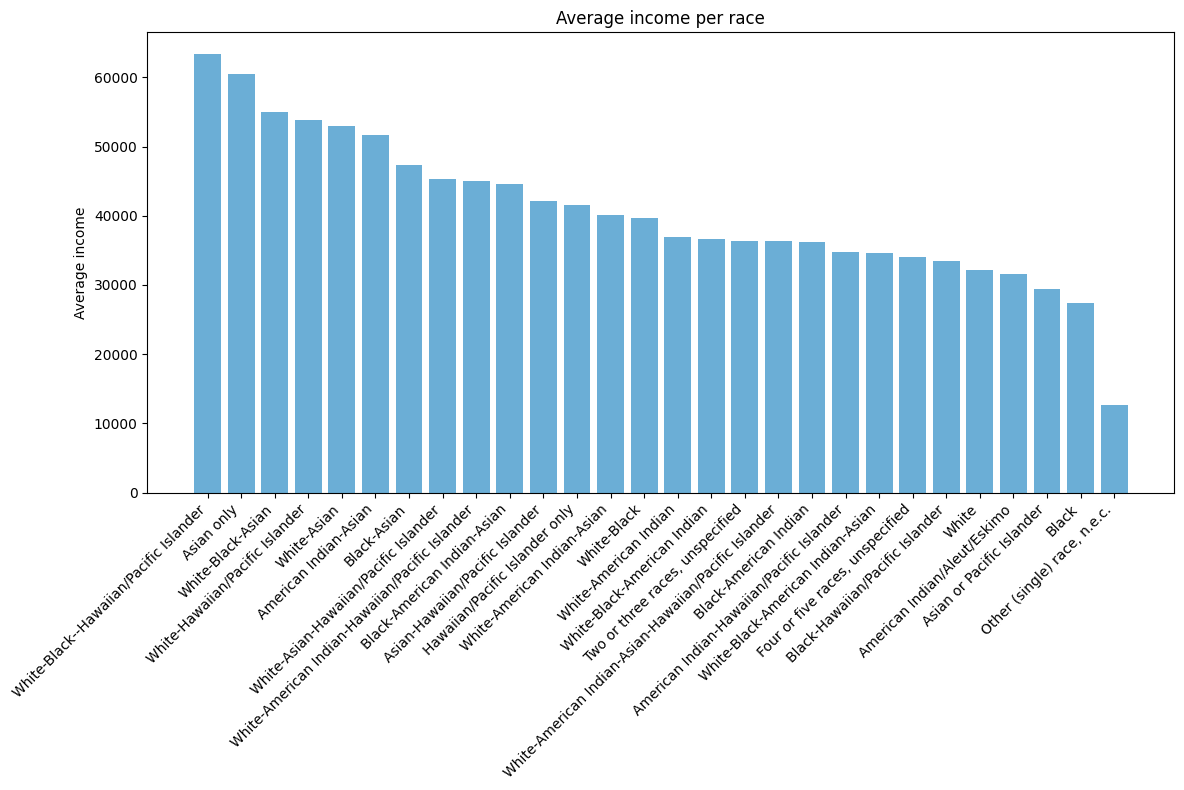

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
bar_container = ax.bar(avg_incomes['race_title'], avg_incomes['INCWAGE'], color=plt.cm.tab20c.colors[1]
        )

ax.set_title('Average income per race', y = 1)
ax.set(ylabel='Average income')
ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')

plt.tight_layout()
plt.savefig(r'../../plots/income/avg_per_race_overall.png')
plt.show()

### per year

In [12]:
def plot_avg_income_year(df: pd.DataFrame, year: int):
    df = df[df['YEAR'] == year]
    
    # unweighed
    # avg_incomes = df.groupby(['race_title'])['INCWAGE'].mean().reset_index().sort_values('INCWAGE', ascending=False)

    # weighed
    avg_incomes = df.groupby('race_title').apply(weighed_avg_income, 'INCWAGE', 'ASECWT').reset_index()
    avg_incomes.columns = ['race_title', 'INCWAGE']
    avg_incomes.sort_values('INCWAGE', ascending=False, inplace=True)

    display(avg_incomes)

    fig, ax = plt.subplots(figsize=(12, 8))
    bar_container = ax.bar(avg_incomes['race_title'], avg_incomes['INCWAGE'], color=plt.cm.tab20c.colors[1]
            )

    ax.set_title(f'{year}: Average income per race', y = 1)
    ax.set(ylabel='Average income')
    ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')

    plt.tight_layout()
    plt.savefig(f'../../plots/income/avg_per_race_{year}.png')
    plt.show()

    return(avg_incomes)

,race_title,INCWAGE
20,White-Black--Hawaiian/Pacific Islander,166386.631921
0,American Indian-Asian,143982.279932
9,"Four or five races, unspecified",98394.338768
3,Asian only,88746.849462
17,White-Asian,84838.872715
18,White-Asian-Hawaiian/Pacific Islander,74401.086168
14,White-American Indian-Asian,72418.444740
12,White,67089.443583
16,White-American Indian-Hawaiian/Pacific Islander,62057.739599
22,White-Black-Asian,59714.908646


C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\161586944.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


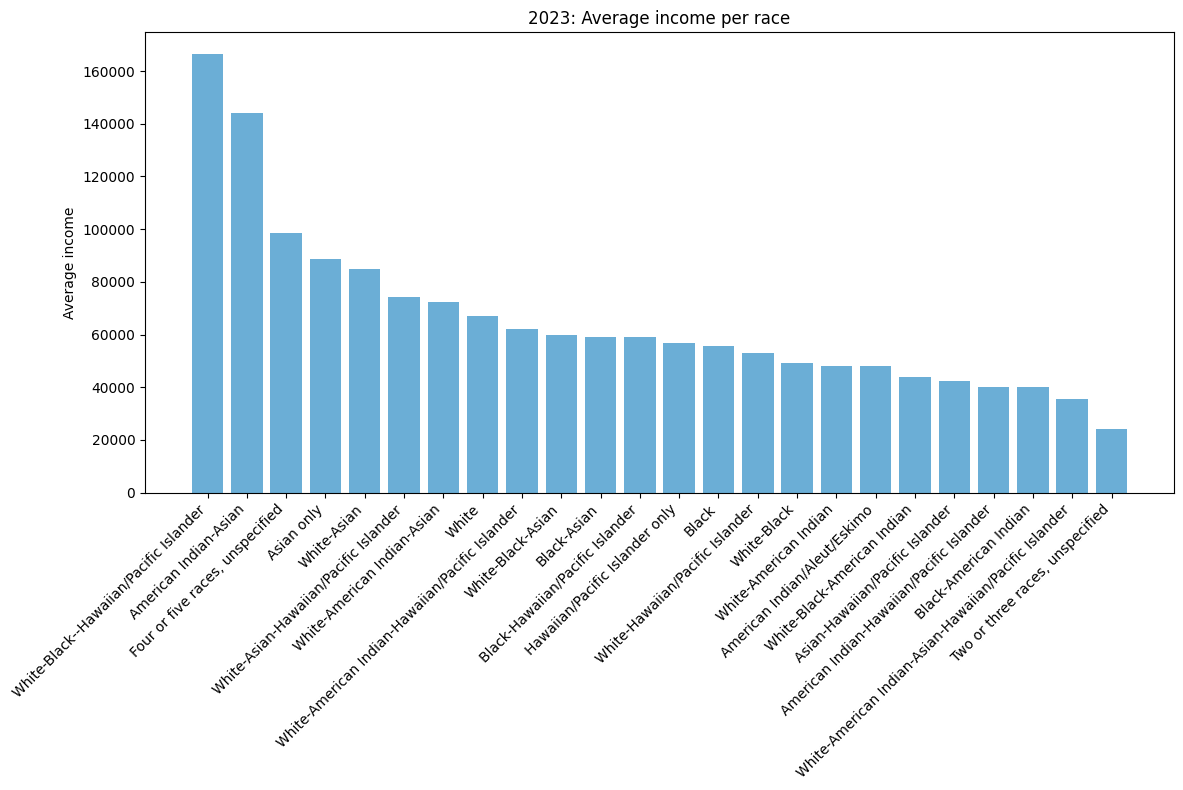

In [13]:
avg_incomes_2023 = plot_avg_income_year(income_races, 2023)

,race_title,INCWAGE
22,White-Black-Asian,153326.703934
19,White-Black--Hawaiian/Pacific Islander,95000.000000
21,White-Black-American Indian-Asian,89324.472961
3,Asian only,74097.129398
11,"Two or three races, unspecified",72315.745276
20,White-Black-American Indian,70898.625402
7,Black-Asian,61060.084730
16,White-Asian,59919.263940
12,White,58924.071385
4,Asian-Hawaiian/Pacific Islander,54649.327768


C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\161586944.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


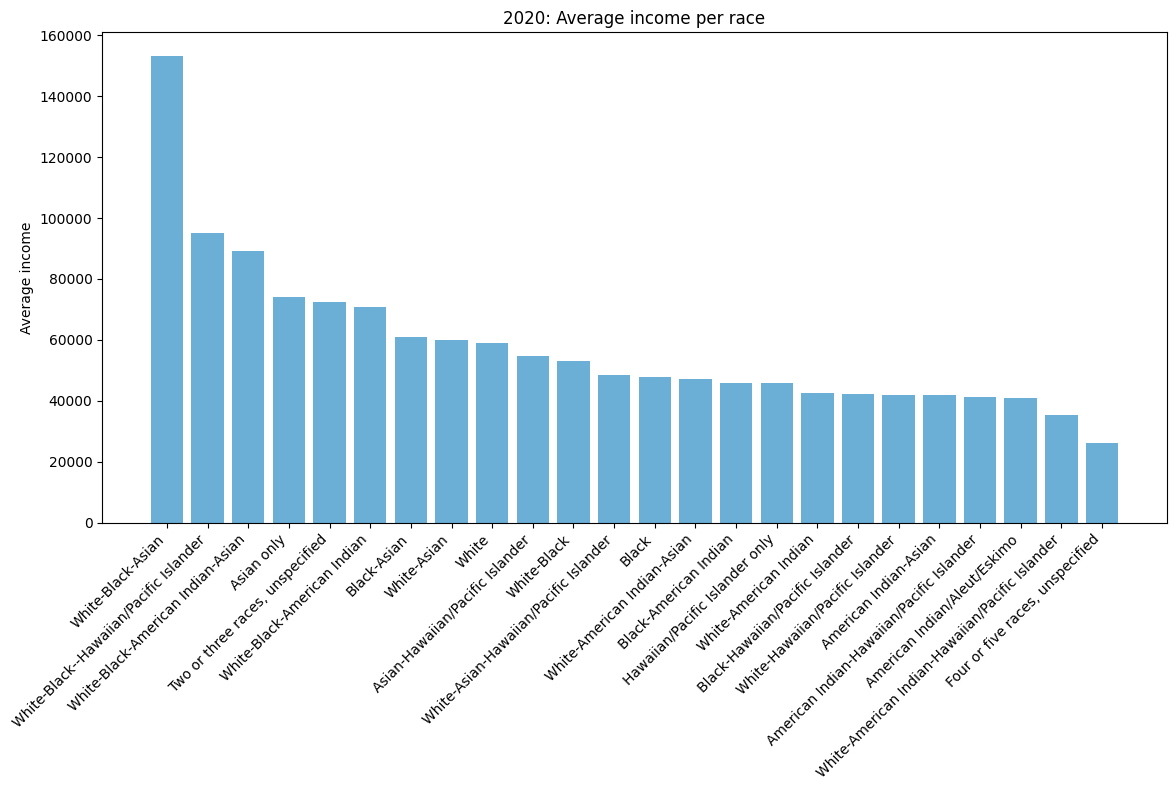

In [14]:
avg_incomes_2020 = plot_avg_income_year(income_races, 2020)

,race_title,INCWAGE
15,White-Asian-Hawaiian/Pacific Islander,60729.881776
14,White-Asian,52615.620741
2,Asian only,51482.112880
18,White-Black-Asian,50000.000000
0,American Indian-Asian,48631.725784
11,White,43973.148057
10,"Two or three races, unspecified",43283.516064
9,Hawaiian/Pacific Islander only,36304.879735
4,Black,34777.203130
16,White-Black,34227.551179


C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\161586944.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


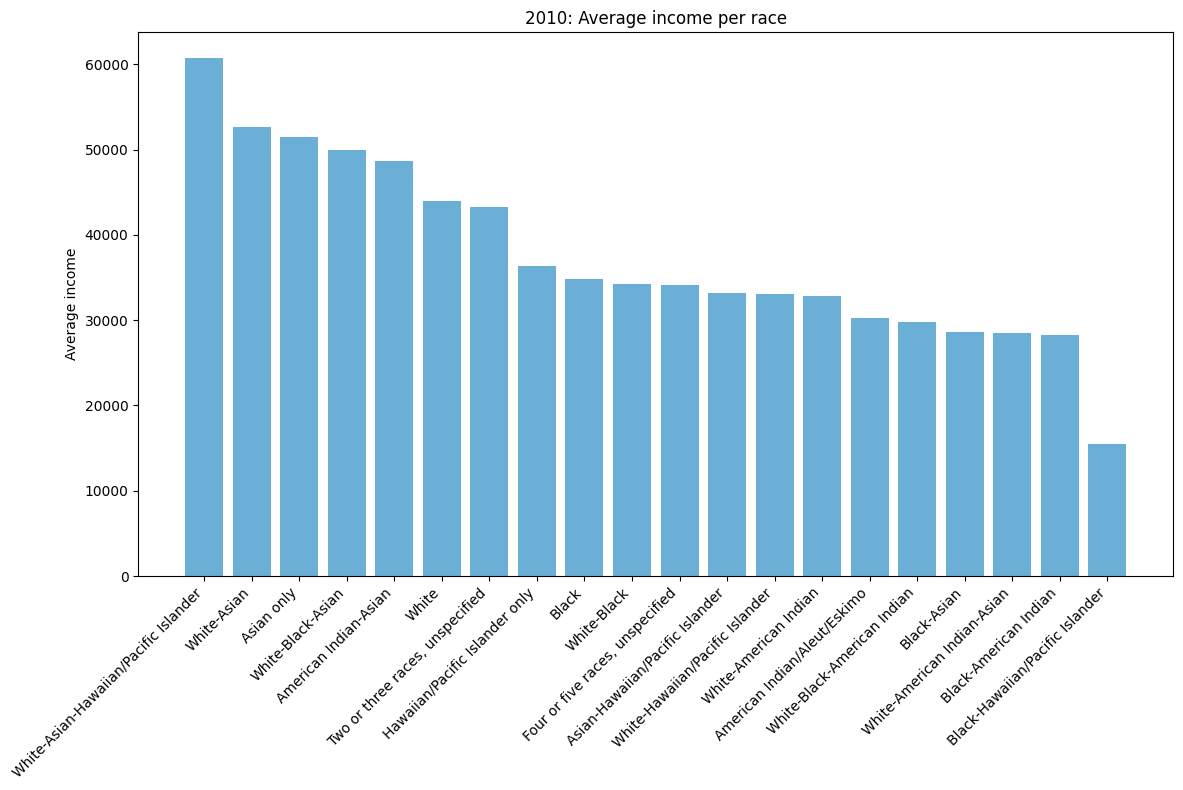

In [15]:
avg_incomes_2010 = plot_avg_income_year(income_races, 2010)

,race_title,INCWAGE
1,Asian or Pacific Islander,34557.569811
3,White,31993.849806
2,Black,25956.626945
0,American Indian/Aleut/Eskimo,23421.474853


C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\161586944.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


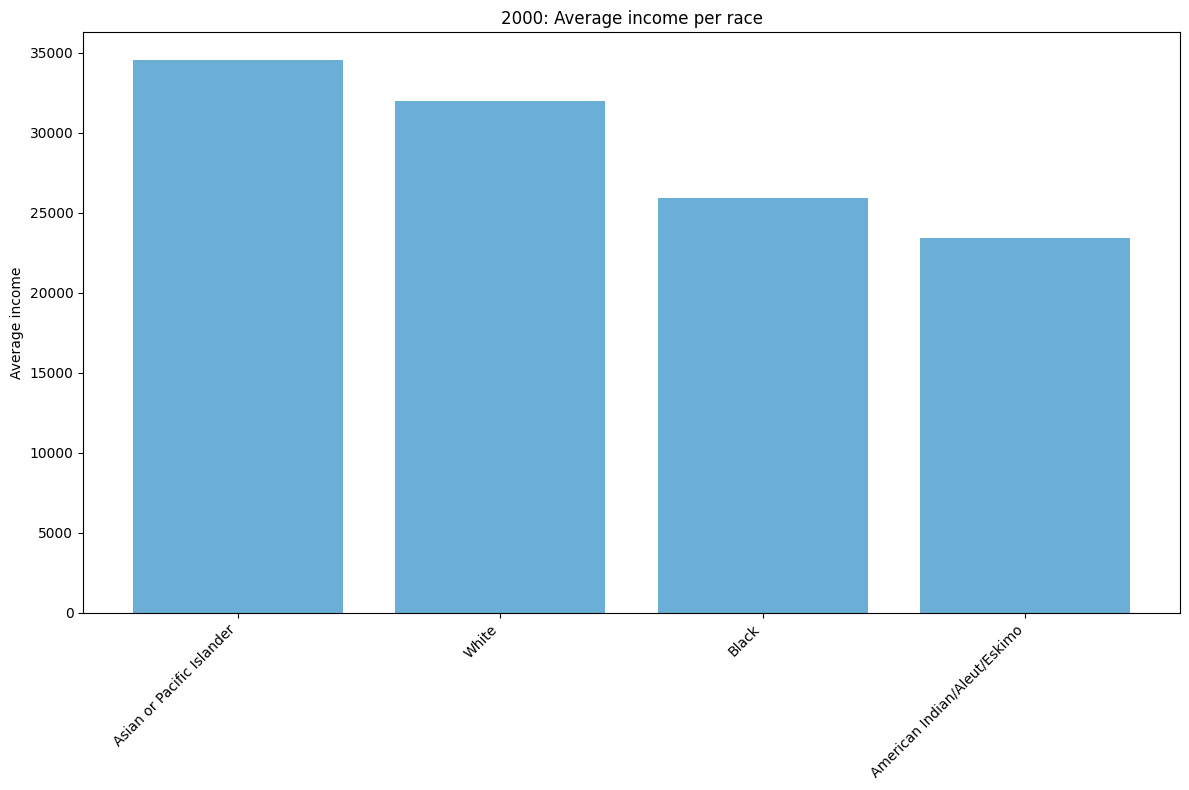

In [16]:
avg_incomes_2000 = plot_avg_income_year(income_races, 2000)

,race_title,INCWAGE
1,Asian or Pacific Islander,23035.857513
4,White,22367.805352
3,"Other (single) race, n.e.c.",20890.851514
2,Black,18212.662764
0,American Indian/Aleut/Eskimo,18128.780725


C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\161586944.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


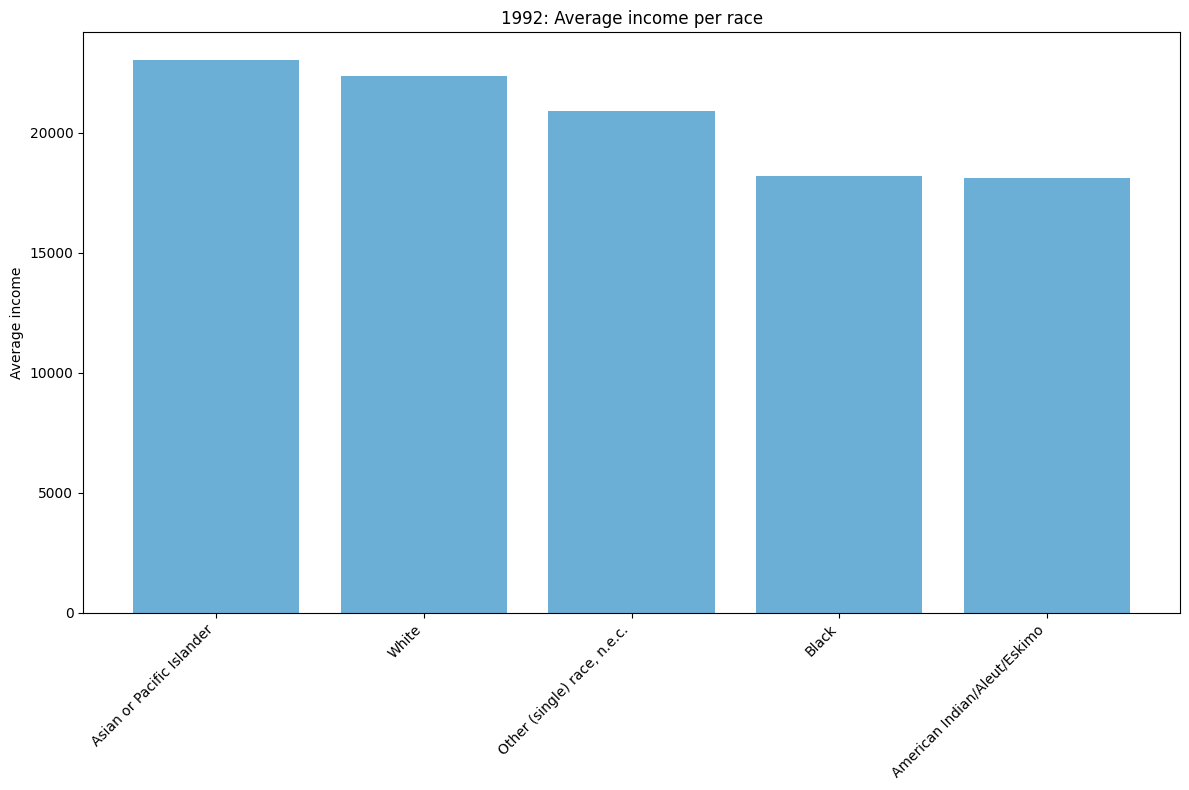

In [17]:
avg_incomes_1992 = plot_avg_income_year(income_races, 1992)

In [18]:
data_df['YEAR'].unique()

array([1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023], dtype=int64)

,race_title,INCWAGE
2,White,5108.796613
1,"Other (single) race, n.e.c.",4393.352124
0,Black,3307.208806


C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\161586944.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


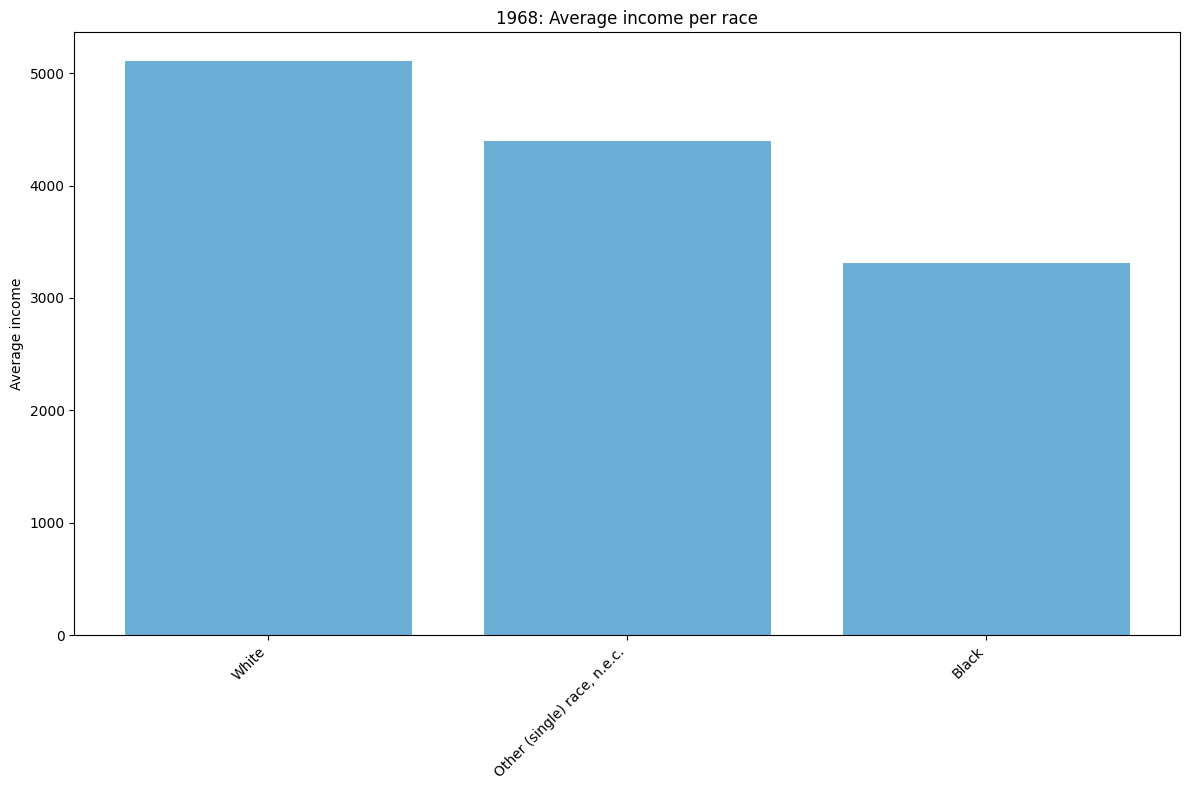

In [19]:
avg_incomes_1992 = plot_avg_income_year(income_races, 1968)

,race_title,INCWAGE
2,White,5986.686906
1,"Other (single) race, n.e.c.",5180.050445
0,Black,4088.057262


C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\161586944.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


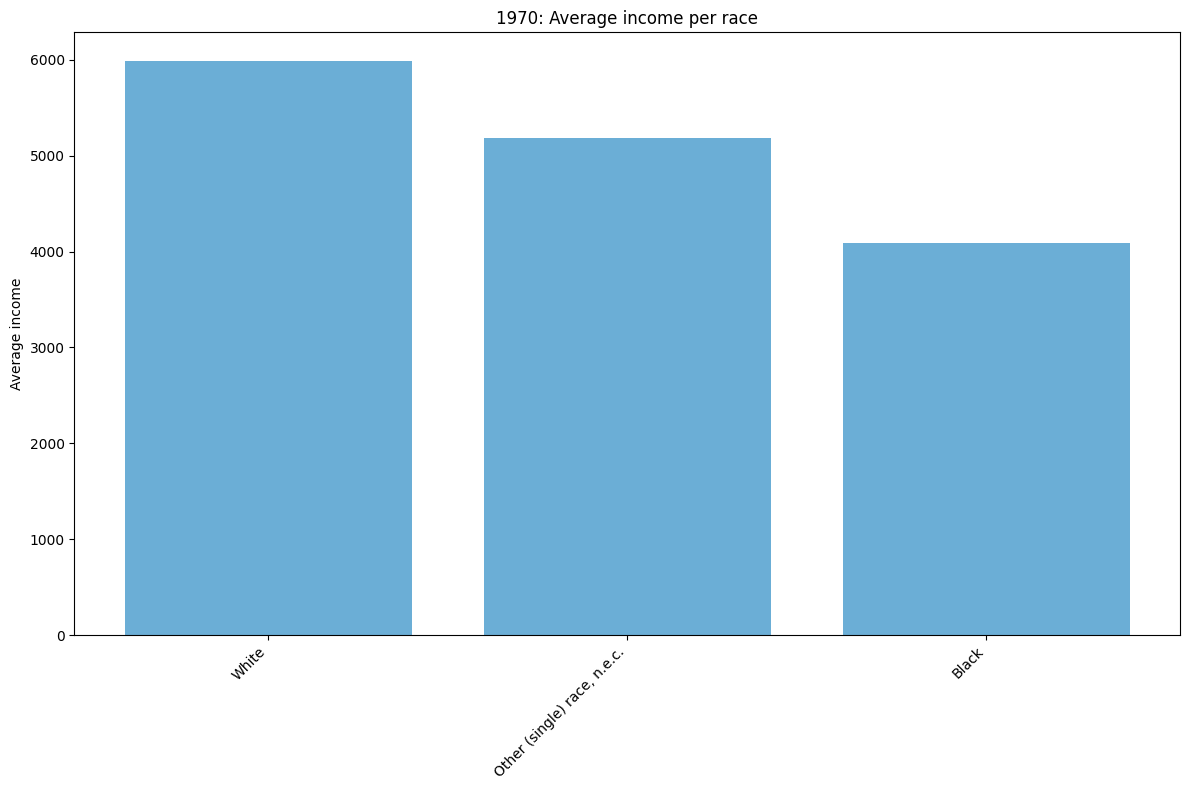

In [20]:
avg_incomes_1992 = plot_avg_income_year(income_races, 1970)

,race_title,INCWAGE
2,White,11892.282909
1,"Other (single) race, n.e.c.",11227.747186
0,Black,9591.788972


C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\161586944.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


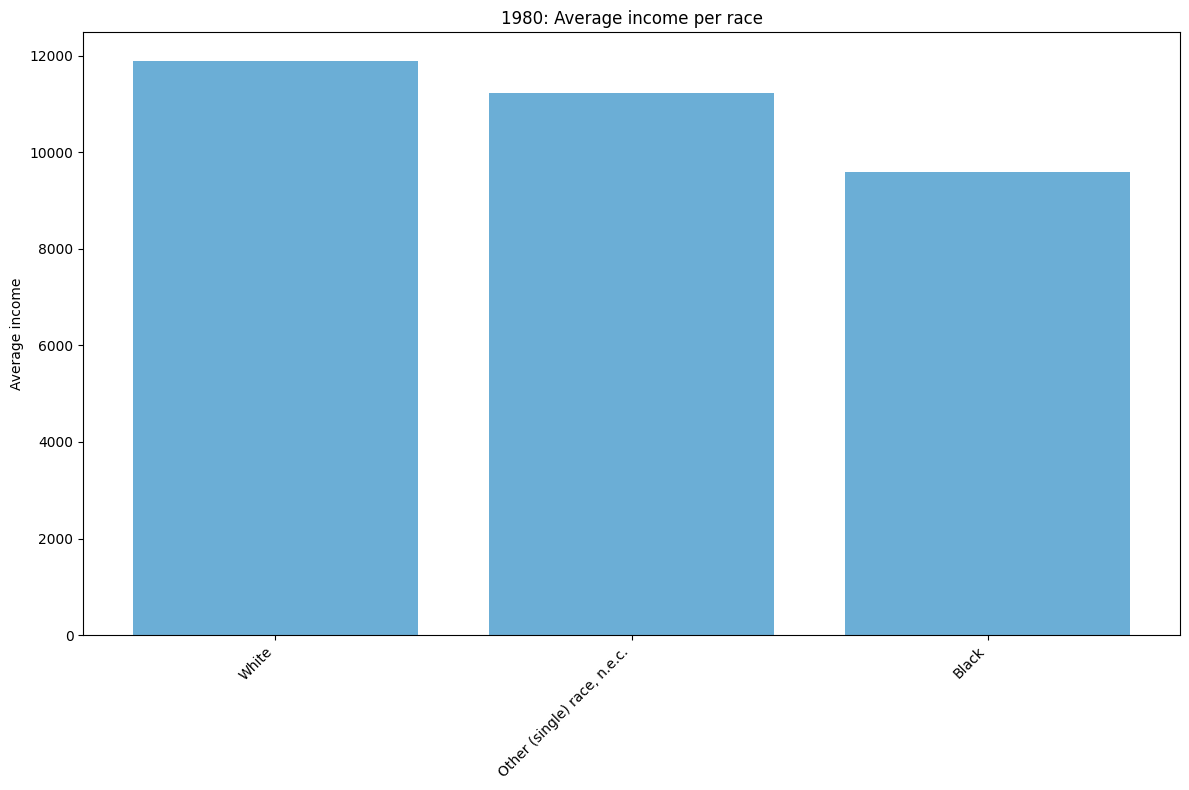

In [21]:
avg_incomes_1980 = plot_avg_income_year(income_races, 1980)

,race_title,INCWAGE
1,Asian or Pacific Islander,20241.299576
4,White,19115.868960
3,"Other (single) race, n.e.c.",18469.354939
0,American Indian/Aleut/Eskimo,15795.287073
2,Black,15403.177205


C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\161586944.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


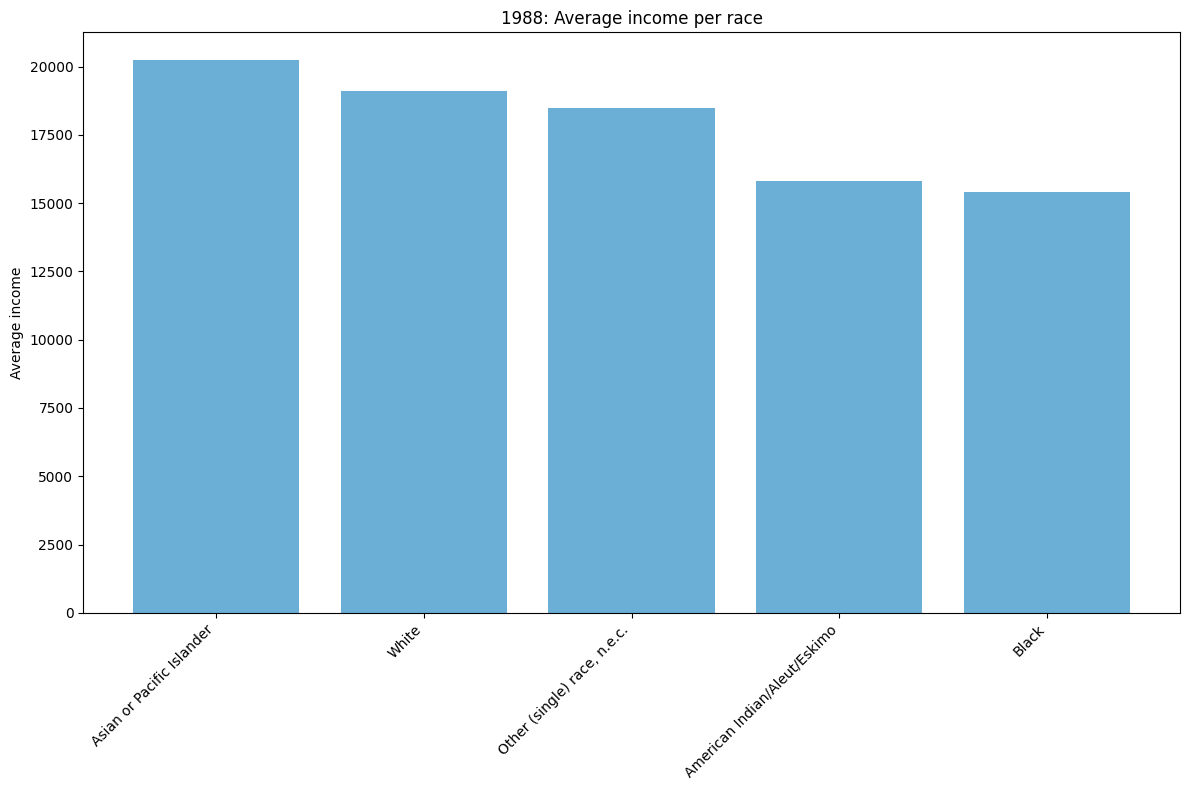

In [22]:
avg_incomes_1988 = plot_avg_income_year(income_races, 1988)

,race_title,INCWAGE
1,Asian or Pacific Islander,39408.783811
3,White,36617.017871
2,Black,28382.574561
0,American Indian/Aleut/Eskimo,27035.447583


C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\161586944.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


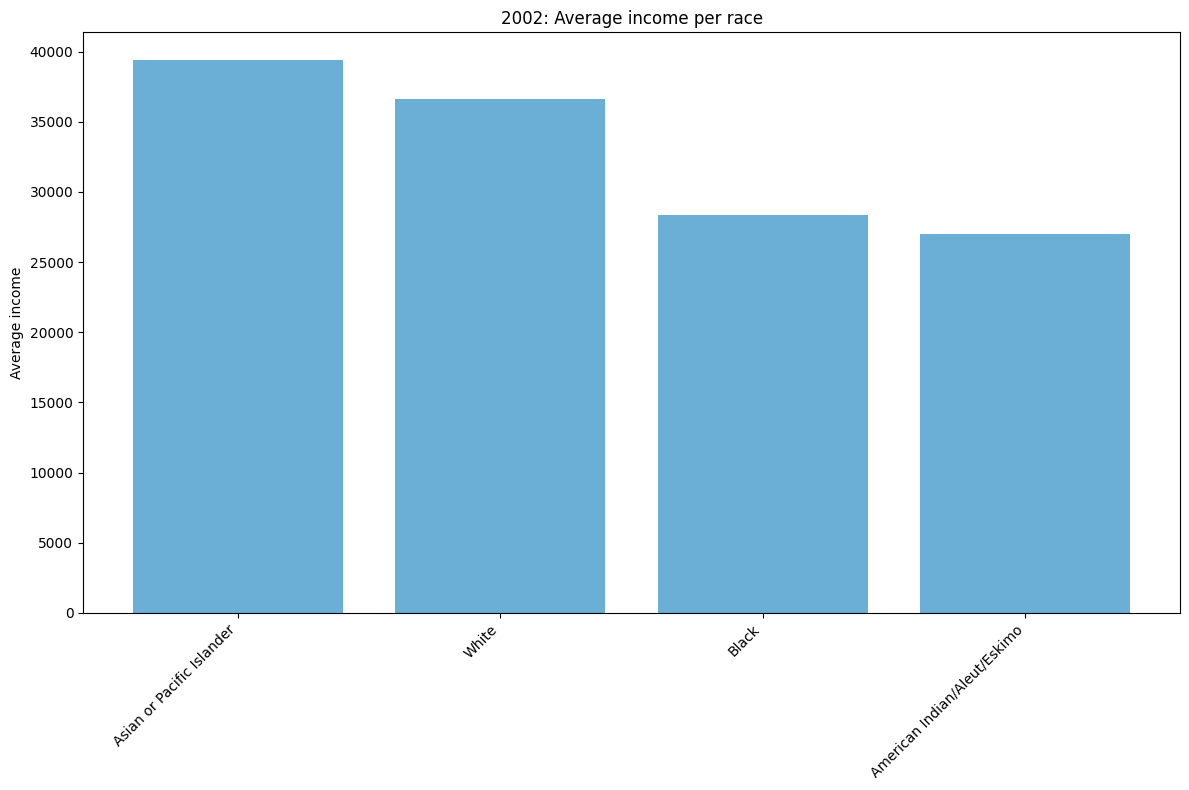

,race_title,INCWAGE
1,Asian or Pacific Islander,39408.783811
3,White,36617.017871
2,Black,28382.574561
0,American Indian/Aleut/Eskimo,27035.447583


In [36]:
plot_avg_income_year(income_races, 2002)

Difference for whites when seperating hispanics from non-hispanics? <br>
There is a huge gap between the average income of hispanic whites and non hispanic whites. However, even non hispanic whites do not earn enough to significantly improve in the overall income ranking (only move 1 place upwards.)

In [23]:
income_races_white = data_df[['RACE', 'INCWAGE', 'YEAR', 'HISPAN', 'ASECWT']]
income_races_white = income_races_white.merge(race_codes_df, on='RACE')

income_races_white_2023 = income_races_white[(income_races_white['YEAR'] == 2023) & (income_races_white['RACE'] == 100)]
# income_races_white_2023['INCWAGE'].mean()
# weighed
weighed_avg_income(income_races_white_2023, 'INCWAGE', 'ASECWT')

67089.44358325677

In [24]:
income_races_white_not_hispanic = income_races_white_2023[income_races_white_2023['HISPAN'] == 0.0]
income_races_white_hispanic = income_races_white_2023[~(income_races_white_2023['HISPAN'] == 0.0)]

In [25]:
# income_races_white_hispanic['INCWAGE'].mean()
weighed_avg_income(income_races_white_hispanic, 'INCWAGE', 'ASECWT')

47724.031853345616

In [26]:
# income_races_white_not_hispanic['INCWAGE'].mean()
weighed_avg_income(income_races_white_not_hispanic, 'INCWAGE', 'ASECWT')

72398.40623800943

In [27]:
avg_incomes_2023

,race_title,INCWAGE
20,White-Black--Hawaiian/Pacific Islander,166386.631921
0,American Indian-Asian,143982.279932
9,"Four or five races, unspecified",98394.338768
3,Asian only,88746.849462
17,White-Asian,84838.872715
18,White-Asian-Hawaiian/Pacific Islander,74401.086168
14,White-American Indian-Asian,72418.444740
12,White,67089.443583
16,White-American Indian-Hawaiian/Pacific Islander,62057.739599
22,White-Black-Asian,59714.908646


----
## Does the immigration time influence the average income?

- citizenship status only available from 1994 onwards, before nan
- same for YRIMMIG

YRIMMIG Universe includes 'Foreign-born persons, and persons born in U.S. outlying areas.'. Hence, we only focus on people in the universe and remove those with code NIU.


"The earliest date identified in these data is "before 1950." Other codes cover a ten-year period (1950-1959), five-year periods between 1960 and 1979, two-year periods for the time between 1980 and 1991, and varying periods (of two years, three years, and four years) thereafter. The specific years grouped together for the period after 1991 differ over time. For example, the 2001 survey combined the years 1998 to 2001, while the 2002 survey provided separate codes for 1998-1999 and 2000-2002. Comparability across the survey period can be achieved by combining data on recent immigrants into a single "after 1991" classification and using the codes provided for the period between 1950 and 1991. Alternatively, the four-digit code can be interpreted as the latest year in which a respondent could possibly have immigrated, since the codes represent the final year in each interval."

In [53]:
income_races = data_df[['RACE', 'INCWAGE', 'YEAR', 'YRIMMIG', 'CITIZEN', 'ASECWT']]
income_races = income_races.merge(race_codes_df, on='RACE')

In [54]:
# only keep people that are in the universe
niu = income_races['YRIMMIG'] == 0
income_races = income_races[~niu]

### 2023


In [55]:
income_races_2023 = income_races[income_races['YEAR'] == 2023]

In [56]:
#all_races_income = income_races_2023.groupby('YRIMMIG')['INCWAGE'].mean().reset_index()
all_races_income = income_races_2023.groupby('YRIMMIG').apply(weighed_avg_income, 'INCWAGE', 'ASECWT').reset_index().rename(columns={0: 'INCWAGE'})

all_races_income = all_races_income.merge(yrimmig_2023, on='YRIMMIG', how='left')

C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\2010444757.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(all_races_income['timespan'], rotation = 45, ha='right')


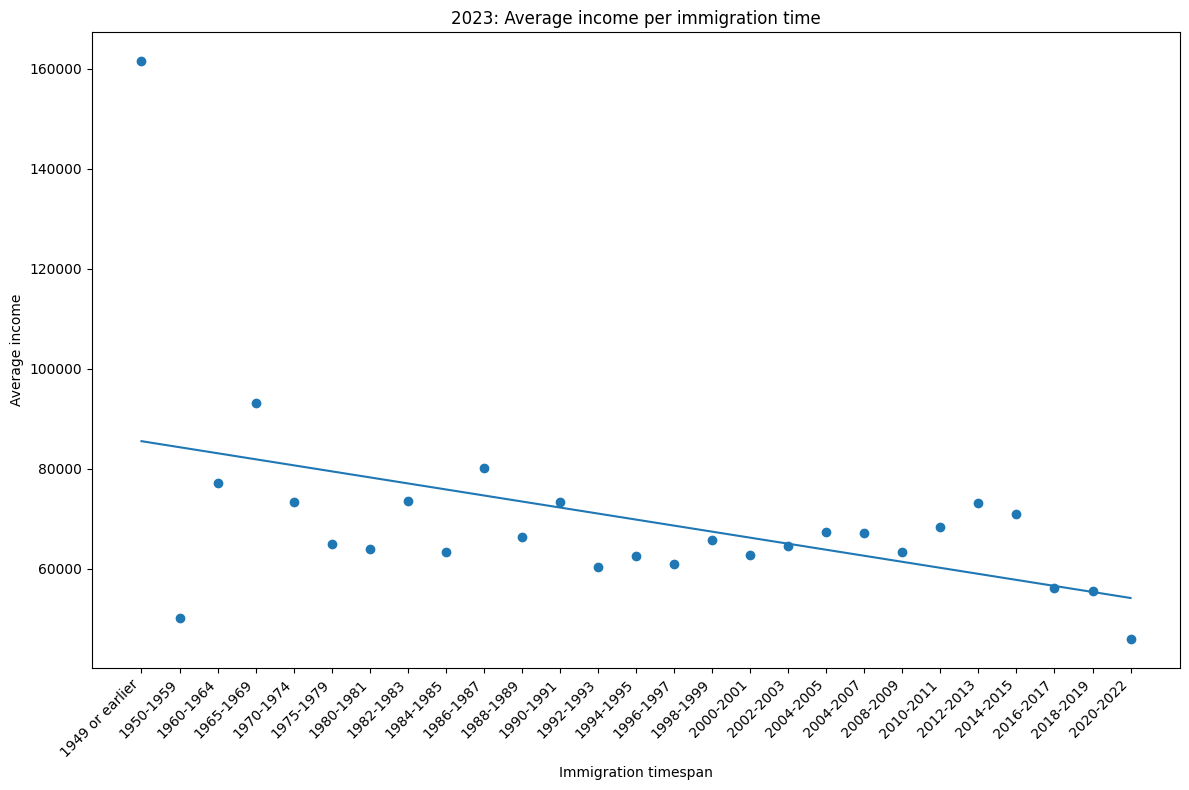

In [57]:
x = np.arange(all_races_income['timespan'].size)
y = all_races_income['INCWAGE']

fit = np.polyfit(x, y, deg=1)
fit_function = np.poly1d(fit)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(all_races_income['timespan'], y, marker='o')
    
ax.set_title(f'2023: Average income per immigration time', y = 1)
ax.set(ylabel='Average income', xlabel='Immigration timespan')
ax.set_xticklabels(all_races_income['timespan'], rotation = 45, ha='right')

ax.plot(all_races_income['timespan'], fit_function(x))

plt.tight_layout()
plt.savefig(f'../../plots/income/yrimmig_2023.png')
plt.show()

In [58]:
# avg_income_yrimmig = income_races_2023.groupby(['RACE', 'YRIMMIG', 'race_title'])['INCWAGE'].mean().reset_index()
avg_income_yrimmig = income_races_2023.groupby(['RACE', 'YRIMMIG', 'race_title']).apply(weighed_avg_income, 'INCWAGE', 'ASECWT').reset_index().rename(columns={0: 'INCWAGE'})

In [59]:
avg_income_yrimmig = avg_income_yrimmig.merge(yrimmig_2023, on='YRIMMIG', how='left')

C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\147536832.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_income_yrimmig_race['timespan'], rotation = 45, ha='right')


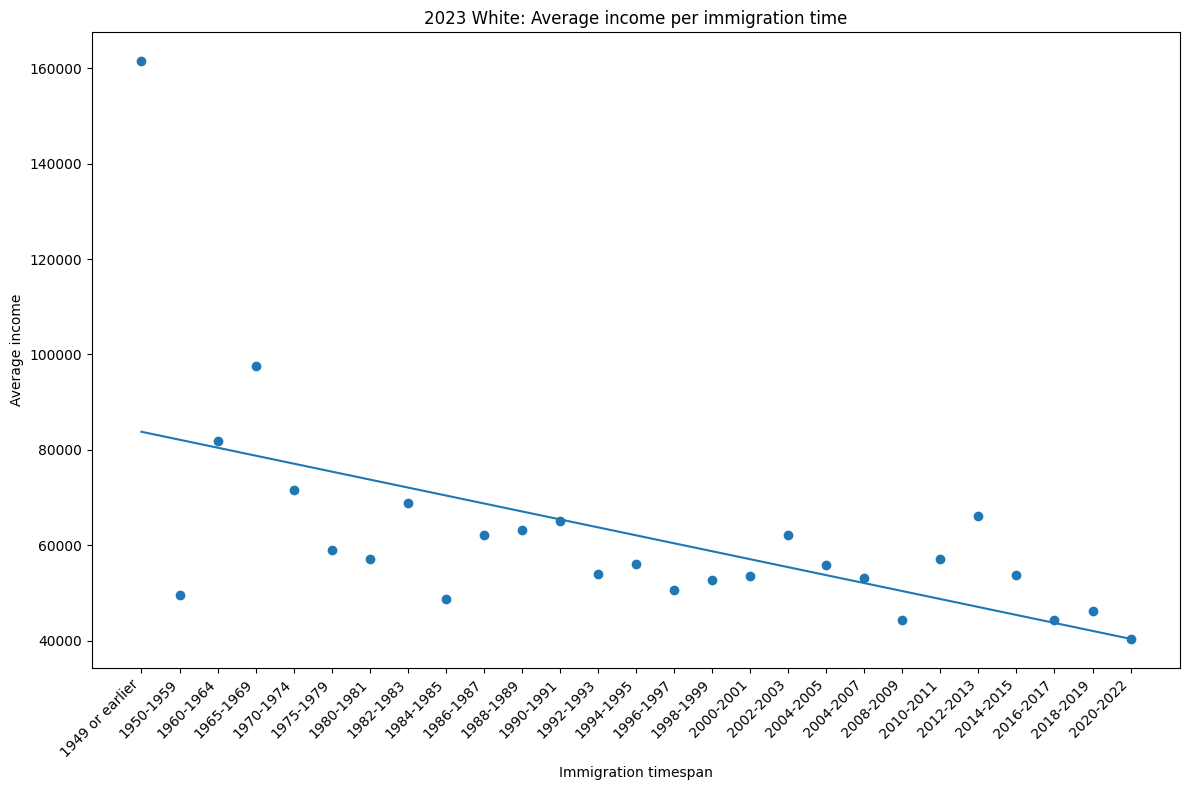

C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\147536832.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_income_yrimmig_race['timespan'], rotation = 45, ha='right')


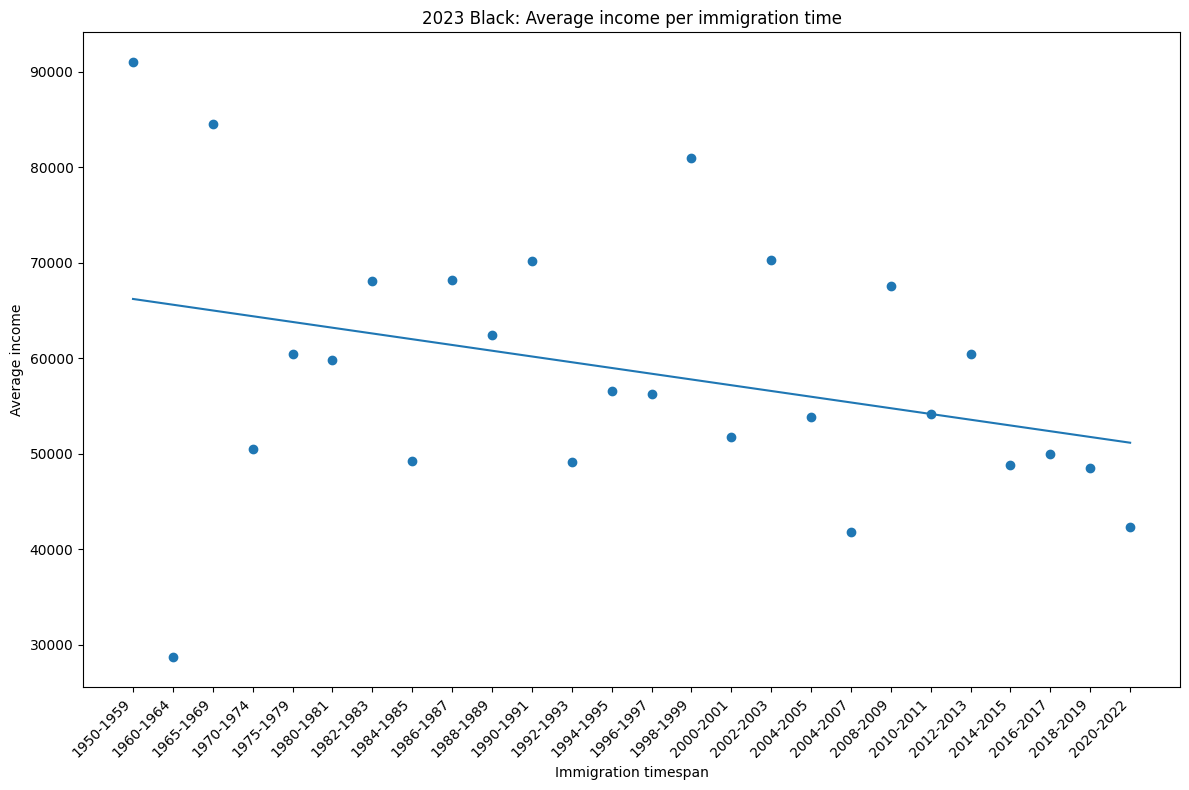

C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\147536832.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_income_yrimmig_race['timespan'], rotation = 45, ha='right')


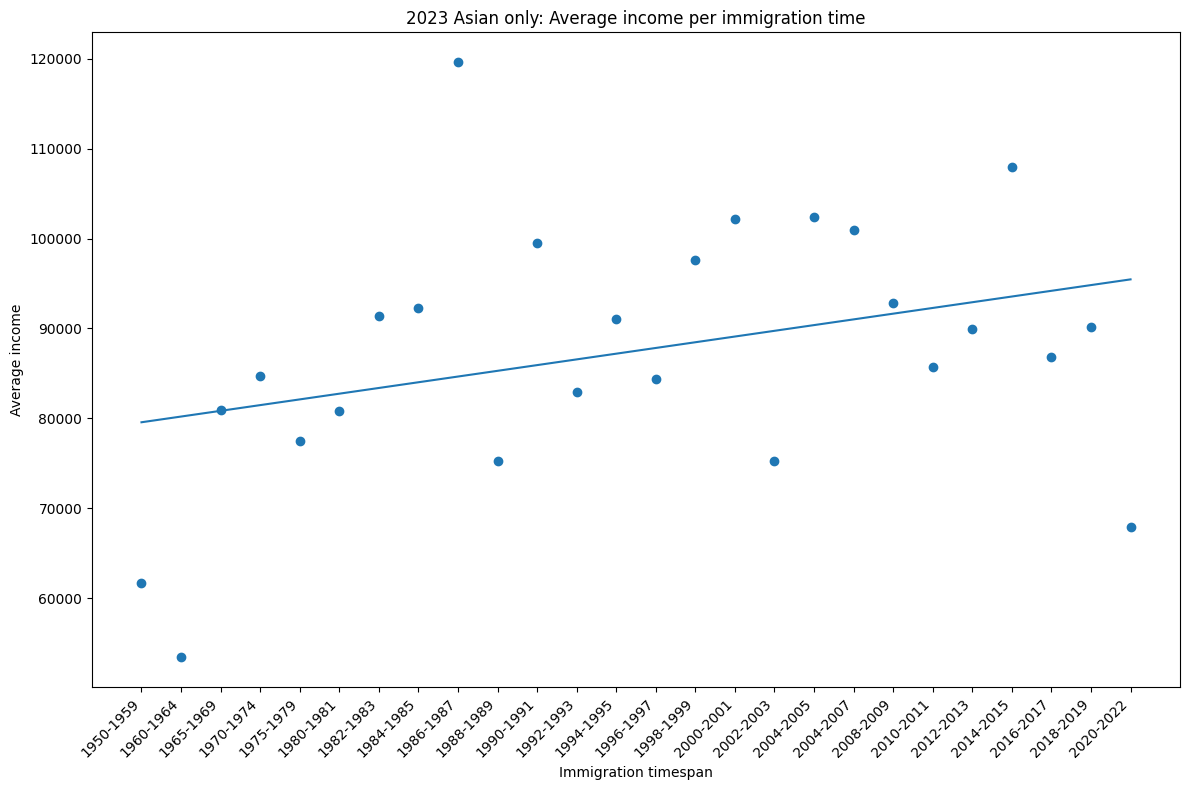

C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\147536832.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_income_yrimmig_race['timespan'], rotation = 45, ha='right')


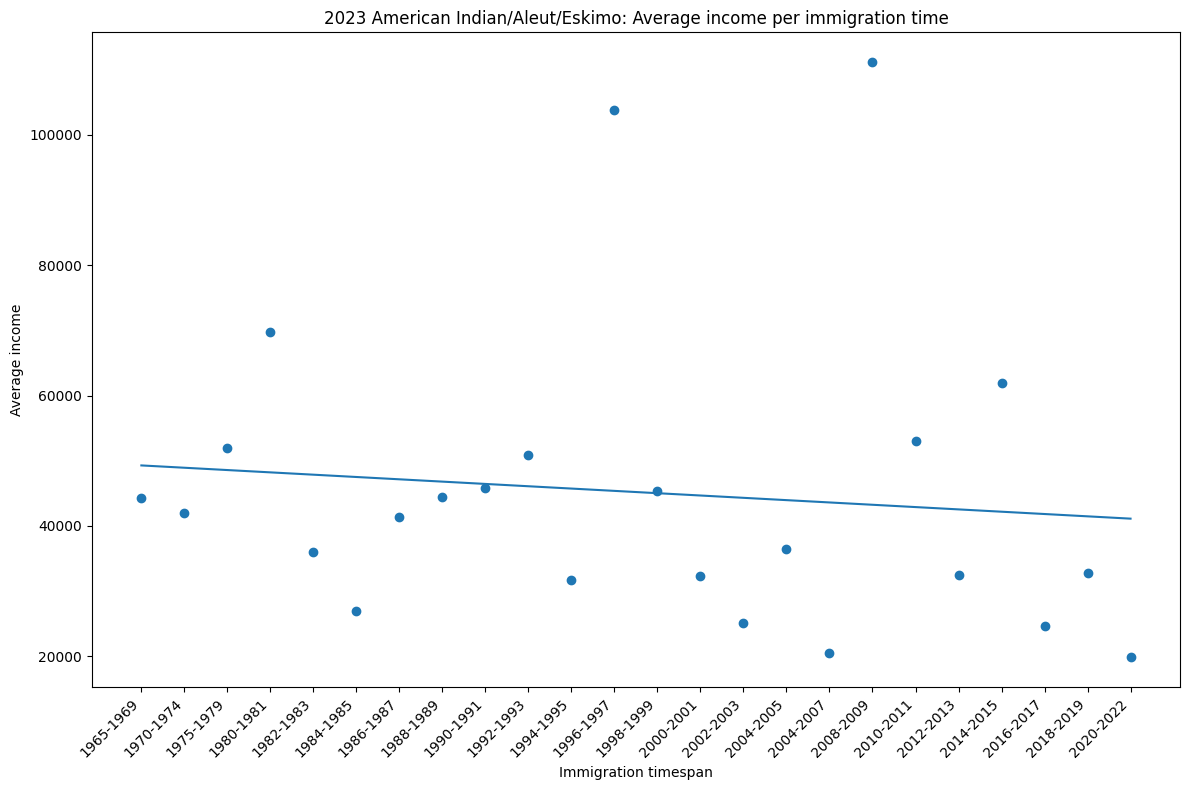

C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\147536832.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_income_yrimmig_race['timespan'], rotation = 45, ha='right')


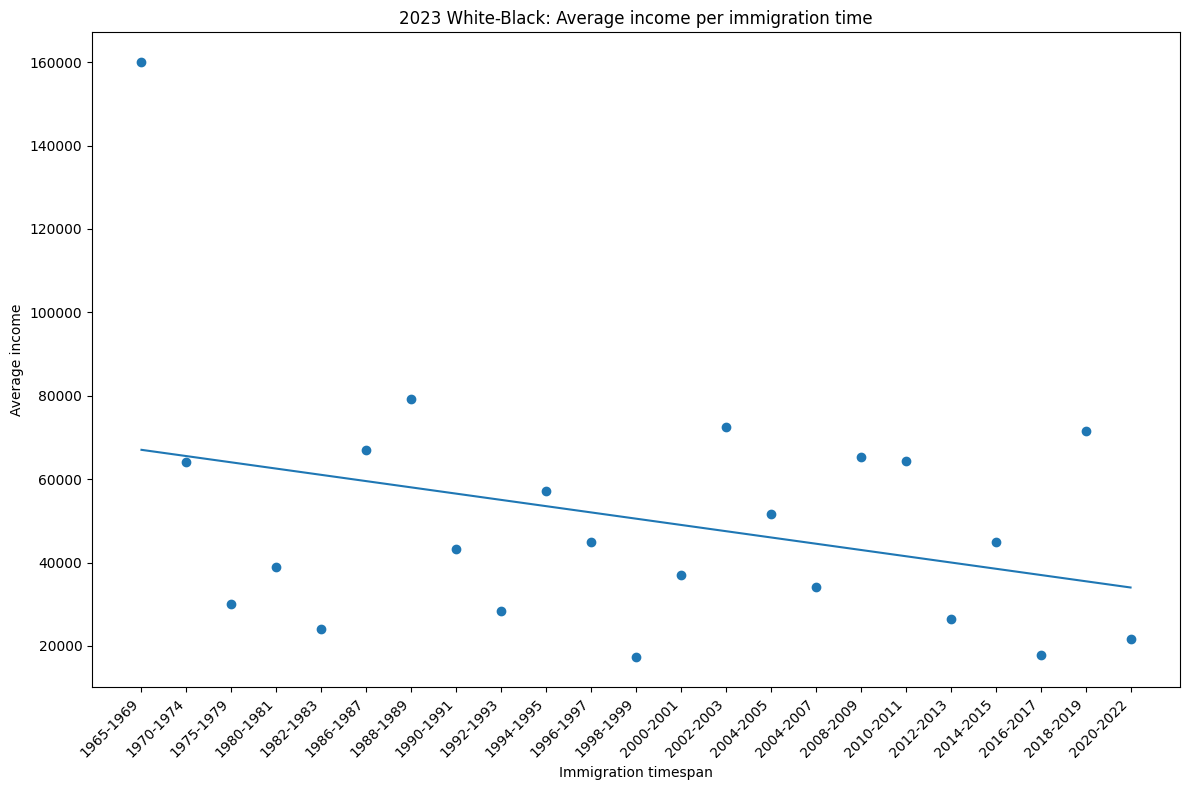

In [60]:
for race in top_5_races:
    avg_income_yrimmig_race = avg_income_yrimmig[avg_income_yrimmig['RACE'] == race]

    x = np.arange(avg_income_yrimmig_race['timespan'].size)
    y = avg_income_yrimmig_race['INCWAGE']

    fit = np.polyfit(x, y, deg=1)
    fit_function = np.poly1d(fit)

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(avg_income_yrimmig_race['timespan'], y, marker='o')
    
    ax.set_title(f'2023 {avg_income_yrimmig_race["race_title"].values[0]}: Average income per immigration time', y = 1)
    ax.set(ylabel='Average income', xlabel='Immigration timespan')
    ax.set_xticklabels(avg_income_yrimmig_race['timespan'], rotation = 45, ha='right')

    ax.plot(avg_income_yrimmig_race['timespan'], fit_function(x))


    plt.tight_layout()
    plt.savefig(f'../../plots/income/yrimmig_2023_{race}.png')
    plt.show()

----
## Does the citizenship status influence the average income?

In [37]:
avg_income_citizen = data_df[['YEAR', 'RACE', 'CITIZEN', 'INCWAGE', 'ASECWT']]

Since the nan values carry no helpful information and nothing can be even derived from it, they are removed for this part of the analysis.

In [38]:
avg_income_citizen['CITIZEN'].unique()

array([nan,  1.,  5.,  3.,  4.,  2.])

In [39]:
avg_income_citizen['YEAR'].unique()

array([1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023], dtype=int64)

In [40]:
avg_income_citizen.dropna(inplace=True)

C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\3341867856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_income_citizen.dropna(inplace=True)


In [41]:
avg_income_citizen['CITIZEN'] = avg_income_citizen['CITIZEN'].astype('int64')

C:\Users\jputz\AppData\Local\Temp\ipykernel_9152\4014659217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_income_citizen['CITIZEN'] = avg_income_citizen['CITIZEN'].astype('int64')


In [42]:
def plot_avg_income_citizenship(avg_income_citizen: pd.DataFrame, year: int, race: str, r = None):

    # select year
    avg_income_citizen = avg_income_citizen[avg_income_citizen['YEAR'] == year]

    # calculate average income per citizenship
    # avg_income_per_citizenship = avg_income_citizen.groupby('CITIZEN')['INCWAGE'].mean().reset_index()

    # calculate weighed average income per citizenship
    avg_income_per_citizenship = avg_income_citizen.groupby('CITIZEN').apply(weighed_avg_income, 'INCWAGE', 'ASECWT').reset_index().rename(columns={0:'INCWAGE'})

    # merge with citizenship titles
    avg_income_per_citizenship = avg_income_per_citizenship.merge(citizenship_codes_df, on='CITIZEN', how='left')

    # plot as pie chart
    fig, ax = plt.subplots(figsize=(8, 8))
    total = sum(avg_income_per_citizenship['INCWAGE'])
    ax.pie(avg_income_per_citizenship['INCWAGE'], labels=avg_income_per_citizenship['citizenship_title'],
            rotatelabels=True, labeldistance=.1, explode=[0.02] * len(avg_income_per_citizenship['citizenship_title']),
            startangle=140, colors=plt.cm.tab10.colors, autopct=lambda p: '{:.0f}$'.format(p * total / 100),
            pctdistance=1.1
            )

    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    ax.set_title(f'Average income per citizenship status {year}\n{race}', y = 1.05)

    plt.tight_layout()
    if r:
        plt.savefig(f'../../plots/income/citizenship_{year}_{r}.png')
    else:
        plt.savefig(f'../../plots/income/citizenship_{year}_{race}.png')
    plt.show()

### 2023

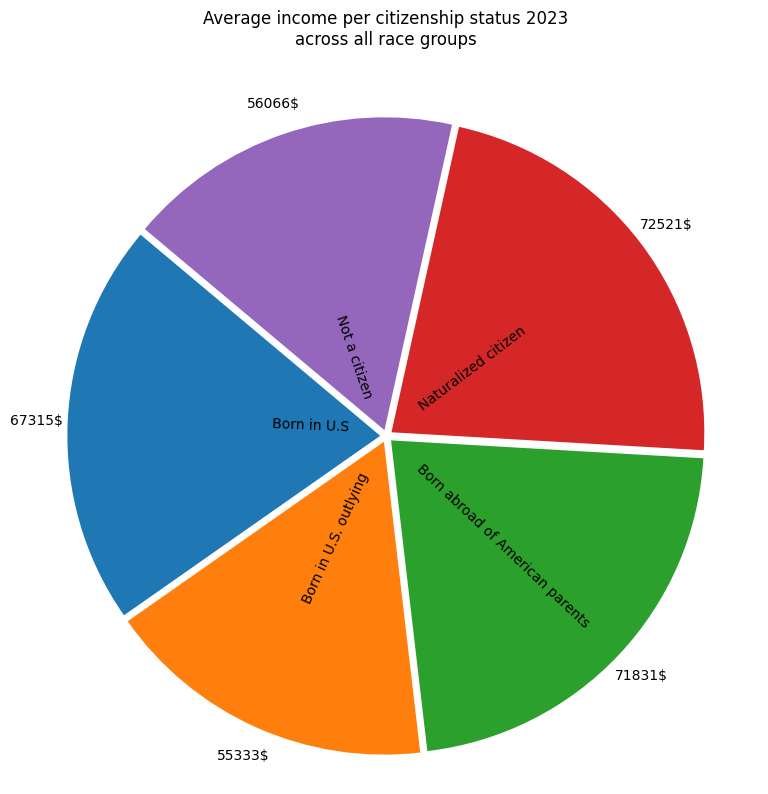

In [43]:
plot_avg_income_citizenship(avg_income_citizen, 2023, 'across all race groups')

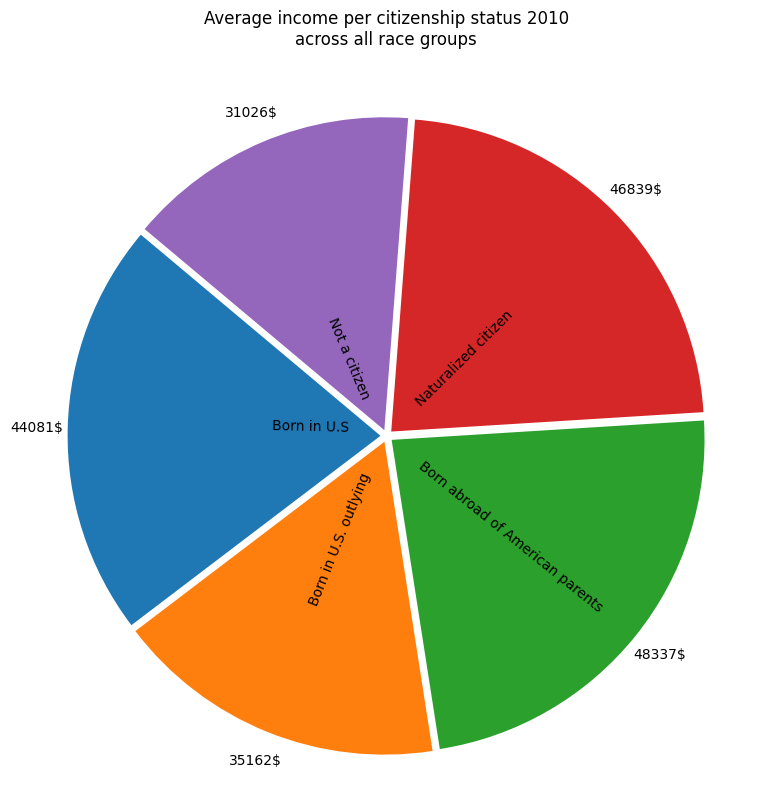

In [44]:
plot_avg_income_citizenship(avg_income_citizen, 2010, 'across all race groups')

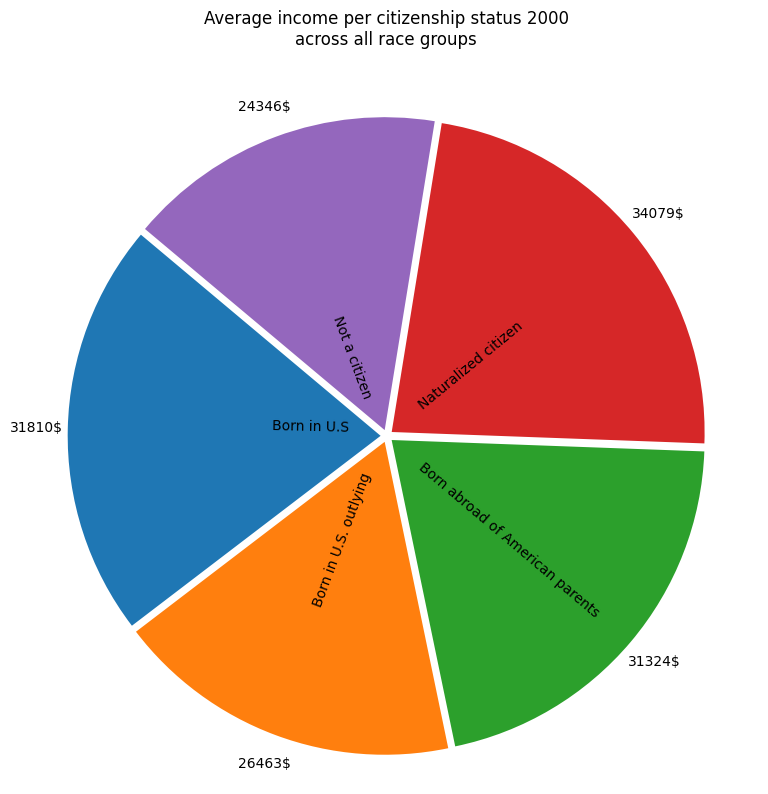

In [45]:
plot_avg_income_citizenship(avg_income_citizen, 2000, 'across all race groups')

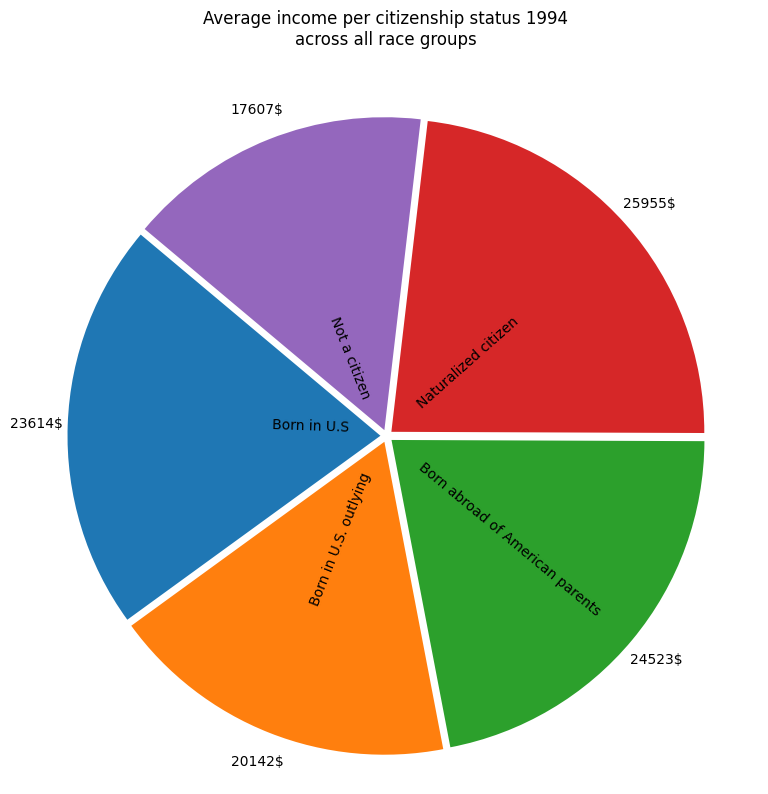

In [46]:
plot_avg_income_citizenship(avg_income_citizen, 1994, 'across all race groups')

How did this evolve over time for all race groups?

In [47]:
def plot_avg_income_citizenship_history(avg_income_citizen: pd.DataFrame, race: str):
    # calculate average income per citizenship and year
    # avg_income_per_citizenship = avg_income_citizen.groupby(['CITIZEN', 'YEAR'])['INCWAGE'].mean().reset_index()

    # calculate weighed average income per citizenship and year
    avg_income_per_citizenship = avg_income_citizen.groupby(['CITIZEN', 'YEAR']).apply(weighed_avg_income, 'INCWAGE', 'ASECWT').reset_index().rename(columns={0:'INCWAGE'})

    # merge with citizenship titles
    avg_income_per_citizenship = avg_income_per_citizenship.merge(citizenship_codes_df, on='CITIZEN', how='left')

    # plot
    fig, ax = plt.subplots(figsize=(12, 8))

    for status in avg_income_per_citizenship['CITIZEN'].unique():
        current_status = avg_income_per_citizenship[avg_income_per_citizenship['CITIZEN'] == status]
        label = current_status['citizenship_title'].unique().item()
        print(label)
        ax.plot(current_status['YEAR'], current_status['INCWAGE'], label = label)

    fig.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1], loc =  'upper left', fontsize = 12, bbox_to_anchor=(0.1, 0.9))

    ax.set_title('Average income per citizenship status over the years', y = 1.05)
    ax.set_xlabel('Year')
    ax.set_ylabel('average income in $')

    plt.tight_layout()
    plt.savefig(f'../../plots/income/citizenship_evolution_{race}.png')
    plt.show()

Born in U.S
Born in U.S. outlying
Born abroad of American parents
Naturalized citizen
Not a citizen


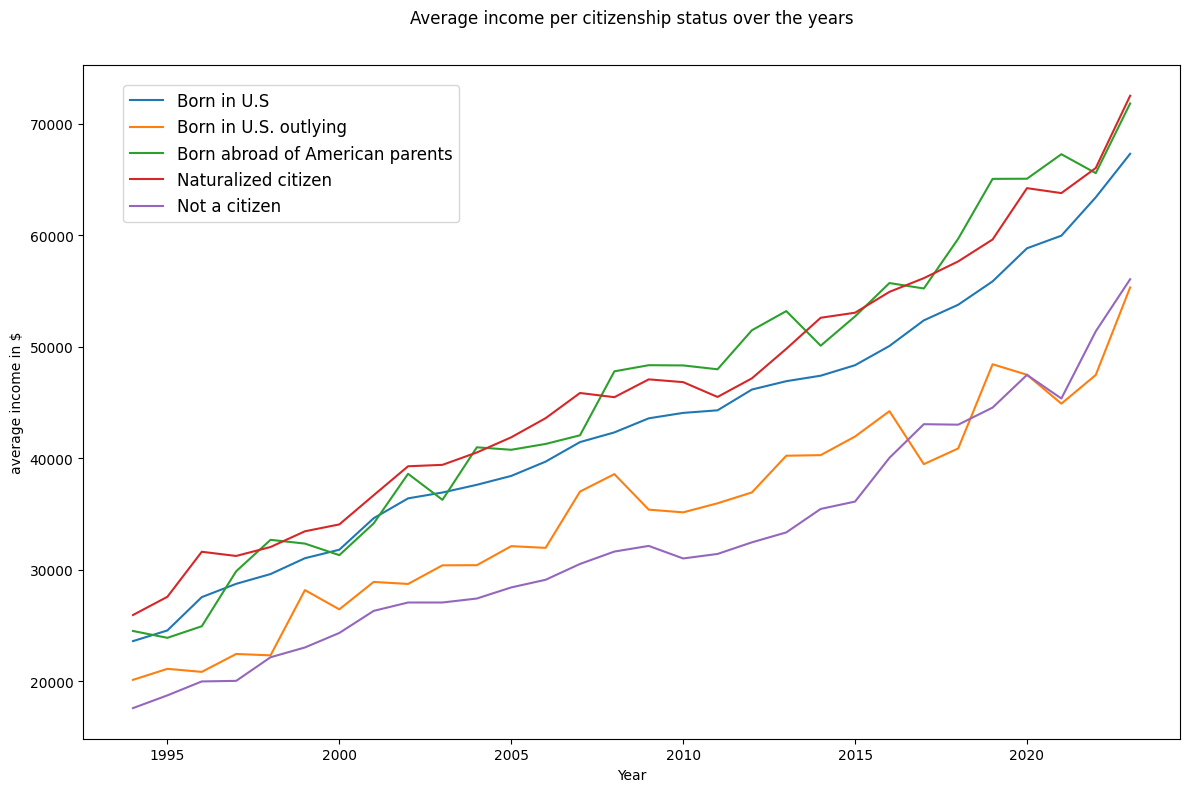

In [48]:
plot_avg_income_citizenship_history(avg_income_citizen, 'across all race groups')

How many people per race belong to a citizenship status?

In [49]:
avg_income_citizen_race = avg_income_citizen[avg_income_citizen['YEAR']==2023].groupby(['RACE', 'CITIZEN']).apply(weighed_avg_income, 'INCWAGE', 'ASECWT').reset_index().rename(columns={0:'INCWAGE'})

In [50]:
avg_income_citizen_race

,RACE,CITIZEN,INCWAGE
0,100,1,69277.920994
1,100,2,58757.644582
2,100,3,73714.225049
3,100,4,65876.766614
4,100,5,44937.631191
...,...,...,...
70,817,1,62057.739599
71,819,1,41055.882420
72,819,5,20410.000000
73,820,1,23948.450478


In [51]:
for c in avg_income_citizen_race['CITIZEN'].unique():
    new = avg_income_citizen_race[avg_income_citizen_race['CITIZEN'] == c]#
    display(new)

,RACE,CITIZEN,INCWAGE
0,100,1,69277.920994
5,200,1,55643.401384
10,300,1,49212.055804
15,651,1,83318.862113
20,652,1,53799.583857
25,801,1,49977.545873
30,802,1,46665.933050
35,803,1,84480.417834
39,804,1,53300.094179
43,805,1,36360.425518


,RACE,CITIZEN,INCWAGE
1,100,2,58757.644582
6,200,2,42767.130737
11,300,2,13598.875994
16,651,2,70000.000000
21,652,2,53456.152130
26,801,2,34753.504316
31,802,2,52000.000000
54,809,2,0.000000
58,810,2,42500.000000


,RACE,CITIZEN,INCWAGE
2,100,3,73714.225049
7,200,3,61865.208519
12,300,3,73000.000000
17,651,3,67121.487122
22,652,3,35955.990984
27,801,3,63967.396720
32,802,3,45880.104779
36,803,3,103962.066368
40,804,3,26054.848234
46,806,3,53691.693983


,RACE,CITIZEN,INCWAGE
3,100,4,65876.766614
8,200,4,63881.610730
13,300,4,53897.229180
18,651,4,88386.195704
23,652,4,57141.641311
28,801,4,56307.103000
33,802,4,59553.088965
37,803,4,71312.067090
41,804,4,65361.098999
44,805,4,71675.124234


,RACE,CITIZEN,INCWAGE
4,100,5,44937.631191
9,200,5,45414.113186
14,300,5,36992.215326
19,651,5,97035.409732
24,652,5,71760.035098
29,801,5,39662.933033
34,802,5,57768.123126
38,803,5,81727.362043
42,804,5,36000.000000
52,808,5,60309.695009


### Does the average income per citizenship status differs between races?

100


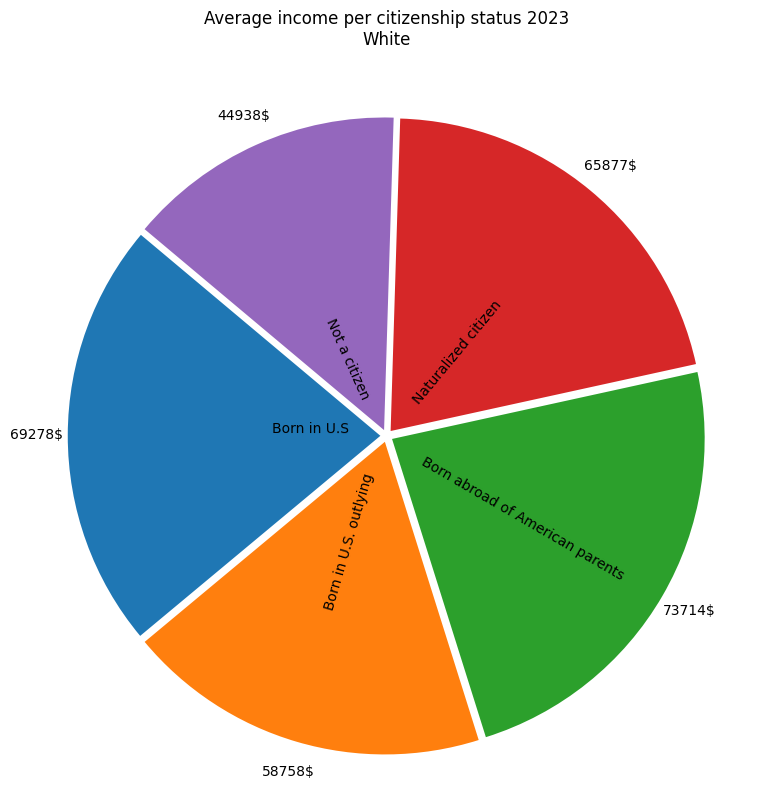

200


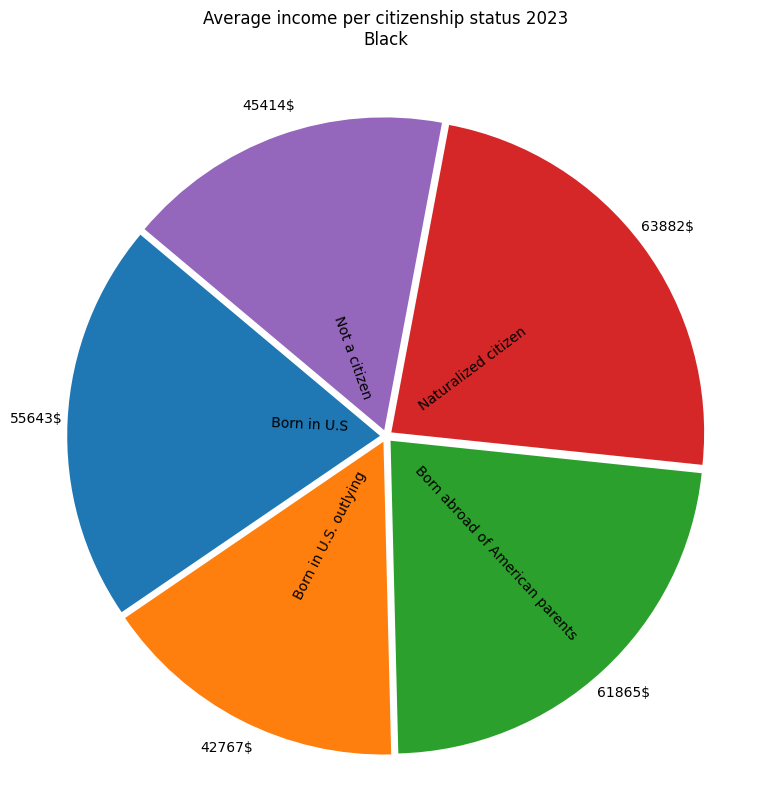

651


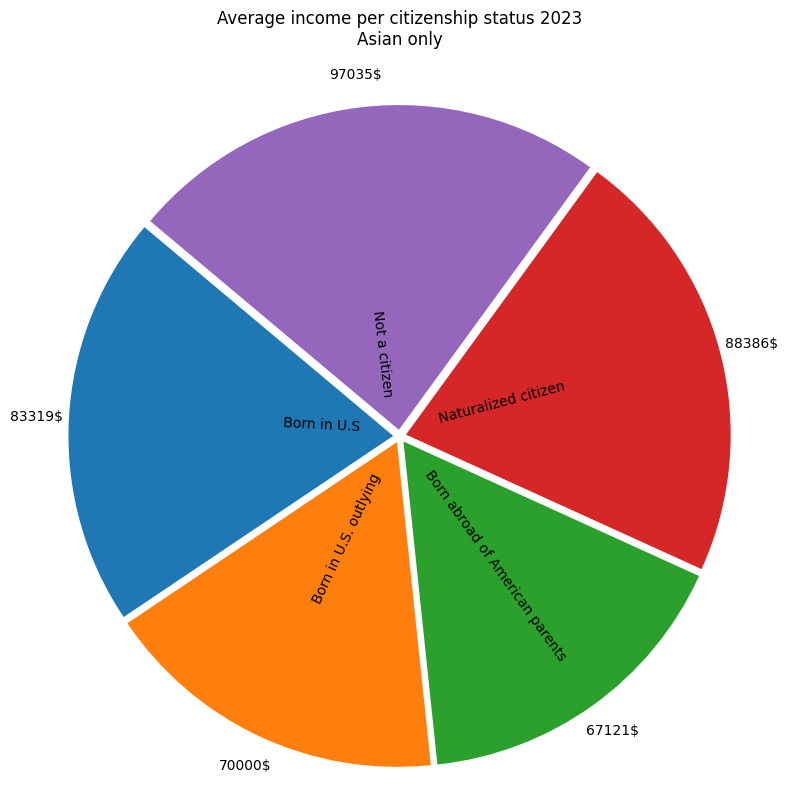

300


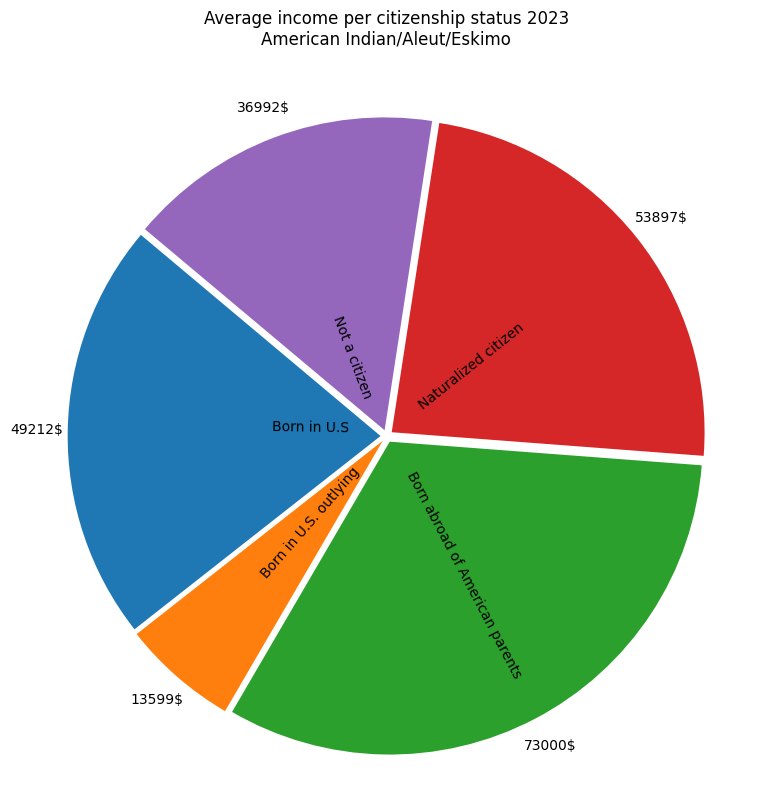

801


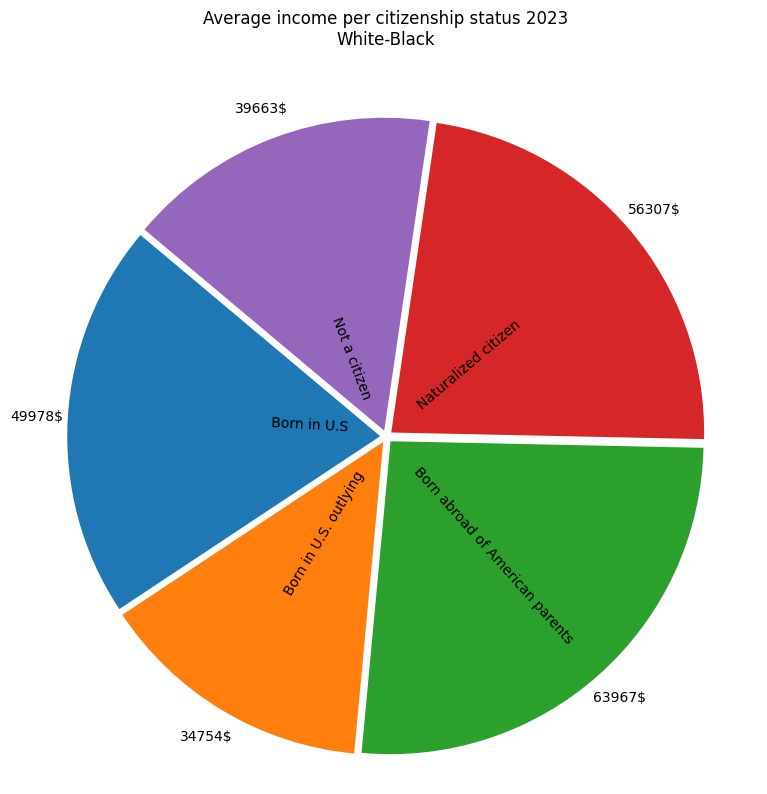

In [52]:
for r in top_5_races:
    print(r)
    # select only entries from race r
    avg_income_citizen_race = avg_income_citizen[avg_income_citizen['RACE'] == r]

    # plot average income per citizenship for race r
    r_title = race_codes_df[race_codes_df['RACE'] == r]['race_title'].item()
    plot_avg_income_citizenship(avg_income_citizen_race, 2023, r_title, r)

----
## Does the average income per occupation differ from race to race?

In [52]:
avg_income_occ = data_df[['OCC2010', 'RACE', 'INCWAGE', 'YEAR', 'occ_title', 'ASECWT', 'OCC10LY']]

Only include people who didn't transition their occupation in the previous year. (Because the INCWAGE is a combination of a persons current job and the job they had longest last year. We don't know for how long a person had a job so, even if we use the variable containing the split version of INCWAGE, we can't even calculate how much that person would have earned for that occupation for an entire year and hence can't compare it to others.)

In [53]:
avg_income_occ = avg_income_occ[avg_income_occ['OCC2010'] == avg_income_occ['OCC10LY']]

In [54]:
data_df[data_df['INCWAGE']==0.]['OCC2010']

0           430.0
7           430.0
13          430.0
16          430.0
17          430.0
            ...  
4051858    7855.0
4052024    7855.0
4052105    7855.0
4052182    7855.0
4052202    7855.0
Name: OCC2010, Length: 291875, dtype: float64

In [55]:
df_802 = avg_income_occ[avg_income_occ['RACE'] == 802]
df_802[df_802['OCC10LY'] == 205]

,OCC2010,RACE,INCWAGE,YEAR,occ_title,ASECWT,OCC10LY
1044245,205.0,802,0,2003,"Farmers, Ranchers, and Other Agricultural Mana...",1082.09,205.0
1044401,205.0,802,0,2003,"Farmers, Ranchers, and Other Agricultural Mana...",187.62,205.0
1044462,205.0,802,35000,2003,"Farmers, Ranchers, and Other Agricultural Mana...",429.26,205.0
1044671,205.0,802,10000,2003,"Farmers, Ranchers, and Other Agricultural Mana...",1671.51,205.0
1044701,205.0,802,750,2003,"Farmers, Ranchers, and Other Agricultural Mana...",1345.11,205.0
...,...,...,...,...,...,...,...
1057252,205.0,802,0,2022,"Farmers, Ranchers, and Other Agricultural Mana...",960.52,205.0
1057274,205.0,802,0,2022,"Farmers, Ranchers, and Other Agricultural Mana...",1161.87,205.0
1057283,205.0,802,0,2022,"Farmers, Ranchers, and Other Agricultural Mana...",993.64,205.0
1057474,205.0,802,0,2023,"Farmers, Ranchers, and Other Agricultural Mana...",256.00,205.0


Filter the year

In [56]:
avg_income_occ_2023 = avg_income_occ[avg_income_occ['YEAR'] == 2023]

In [57]:
avg_income_occ_2023 = avg_income_occ_2023.groupby(['OCC2010','RACE']).apply(weighed_avg_income, 'INCWAGE', 'ASECWT').reset_index().rename(columns={0:'INCWAGE'})
avg_income_occ_2023 = avg_income_occ_2023.merge(occ2010_df, left_on='OCC2010', right_on='Code', how='left')
avg_income_occ_2023.drop('Code', axis=1, inplace=True)

In [58]:
avg_income_occ_2023[avg_income_occ_2023['INCWAGE'] == 0.]

,OCC2010,RACE,INCWAGE,occ_title
77,205.0,802,0.0,"Farmers, Ranchers, and Other Agricultural Mana..."
106,310.0,652,0.0,Food Service and Lodging Managers
171,530.0,300,0.0,"Purchasing Agents, Except Wholesale, Retail, a..."
213,710.0,810,0.0,Management Analysts
510,2100.0,803,0.0,"Lawyers, and judges, magistrates, and other ju..."
511,2100.0,805,0.0,"Lawyers, and judges, magistrates, and other ju..."
533,2200.0,811,0.0,Postsecondary Teachers
538,2300.0,652,0.0,Preschool and Kindergarten Teachers
611,2600.0,300,0.0,Artists and Related Workers
636,2750.0,300,0.0,"Musicians, Singers, and Related Workers"


In [59]:
def plot_avg_income_occupation(avg_income_occ: pd.DataFrame, year: int, race: str):

    # select year
    avg_income_occ = avg_income_occ[avg_income_occ['YEAR'] == year]

    # calculate average income per occupation
    avg_income_occ = avg_income_occ.groupby('OCC2010').apply(weighed_avg_income, 'INCWAGE', 'ASECWT').reset_index().rename(columns={0:'INCWAGE'})

    # merge with occupation titles
    avg_income_occ = avg_income_occ.merge(occ2010_df, left_on='OCC2010', right_on='Code', how='left')
    avg_income_occ.drop('Code', axis=1, inplace=True)


    sorted = avg_income_occ.sort_values('INCWAGE', ascending=False)
    top_income = sorted.head(4)
    low_income = sorted.tail(4)
    income = pd.concat([top_income, low_income], ignore_index=True)

    # plot as bar chart
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_container = ax.bar(income['occ_title'], income['INCWAGE'], color=plt.cm.tab20c.colors
                )

    race_title = race_codes_df[race_codes_df['RACE'] == race]['race_title'].item()
    ax.set_title(f'Top/Lowest average incomes per occupation {year}\n{race_title}', y = 1)
    ax.set(ylabel='Average income $')
    ax.bar_label(bar_container, fmt='{:.0f}$')
    ax.set_xticklabels(income['occ_title'], rotation = 45, ha='right')

    plt.tight_layout()
    plt.savefig(f'../../plots/income/top_lowest_{year}_{race}.png')
    plt.show()

100


C:\Users\jputz\AppData\Local\Temp\ipykernel_22152\129563703.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(income['occ_title'], rotation = 45, ha='right')


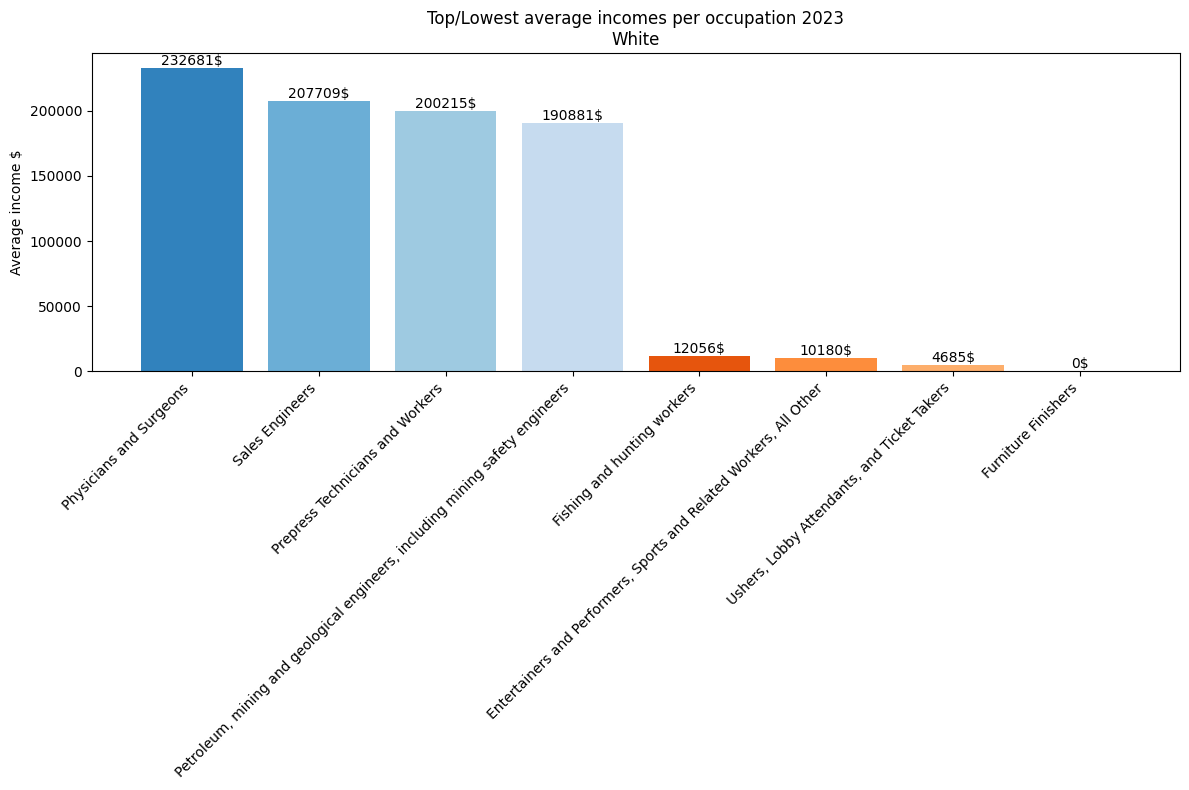

200


C:\Users\jputz\AppData\Local\Temp\ipykernel_22152\129563703.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(income['occ_title'], rotation = 45, ha='right')


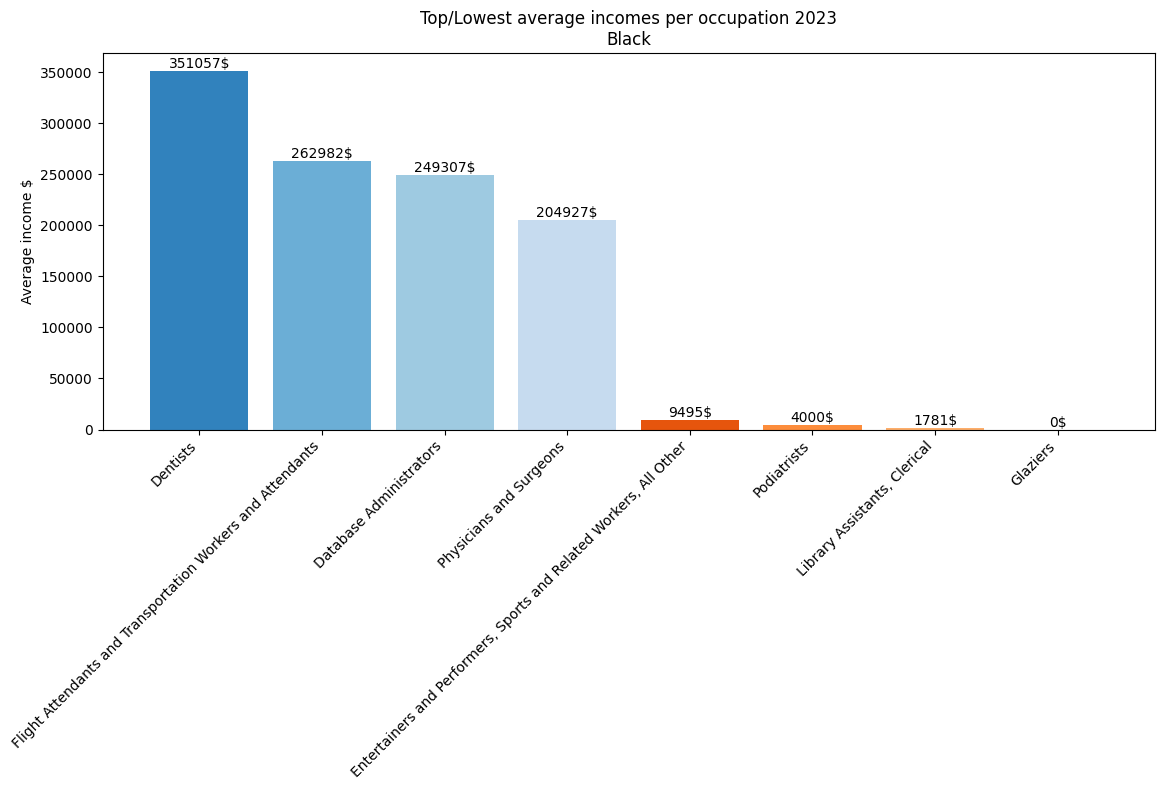

651


C:\Users\jputz\AppData\Local\Temp\ipykernel_22152\129563703.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(income['occ_title'], rotation = 45, ha='right')


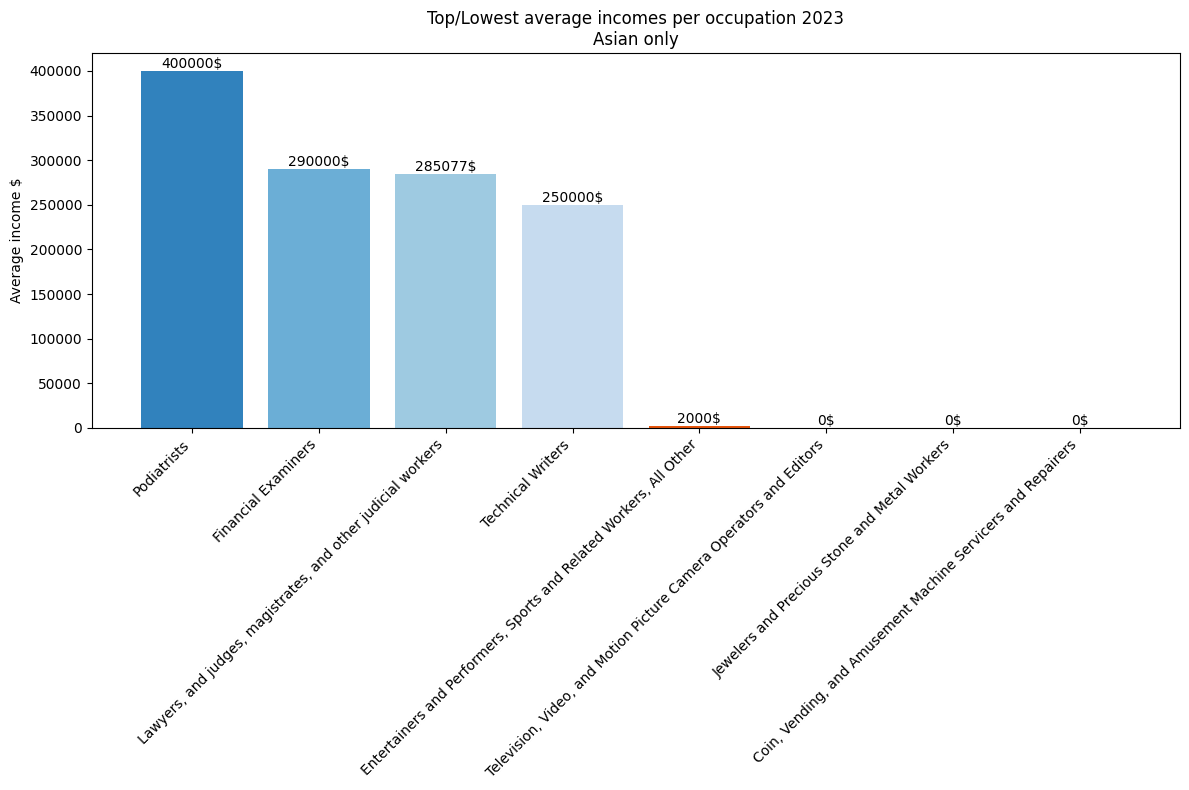

300


C:\Users\jputz\AppData\Local\Temp\ipykernel_22152\129563703.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(income['occ_title'], rotation = 45, ha='right')


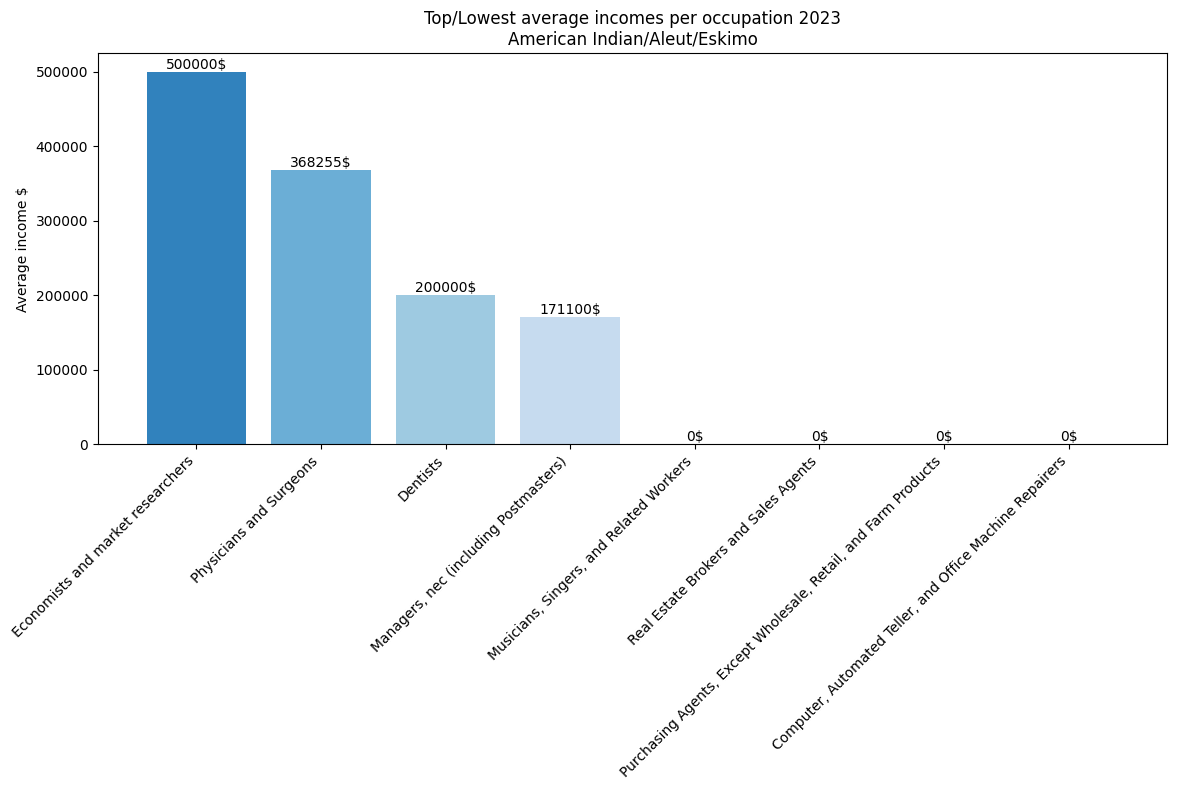

801


C:\Users\jputz\AppData\Local\Temp\ipykernel_22152\129563703.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(income['occ_title'], rotation = 45, ha='right')
C:\Users\jputz\AppData\Local\Temp\ipykernel_22152\129563703.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


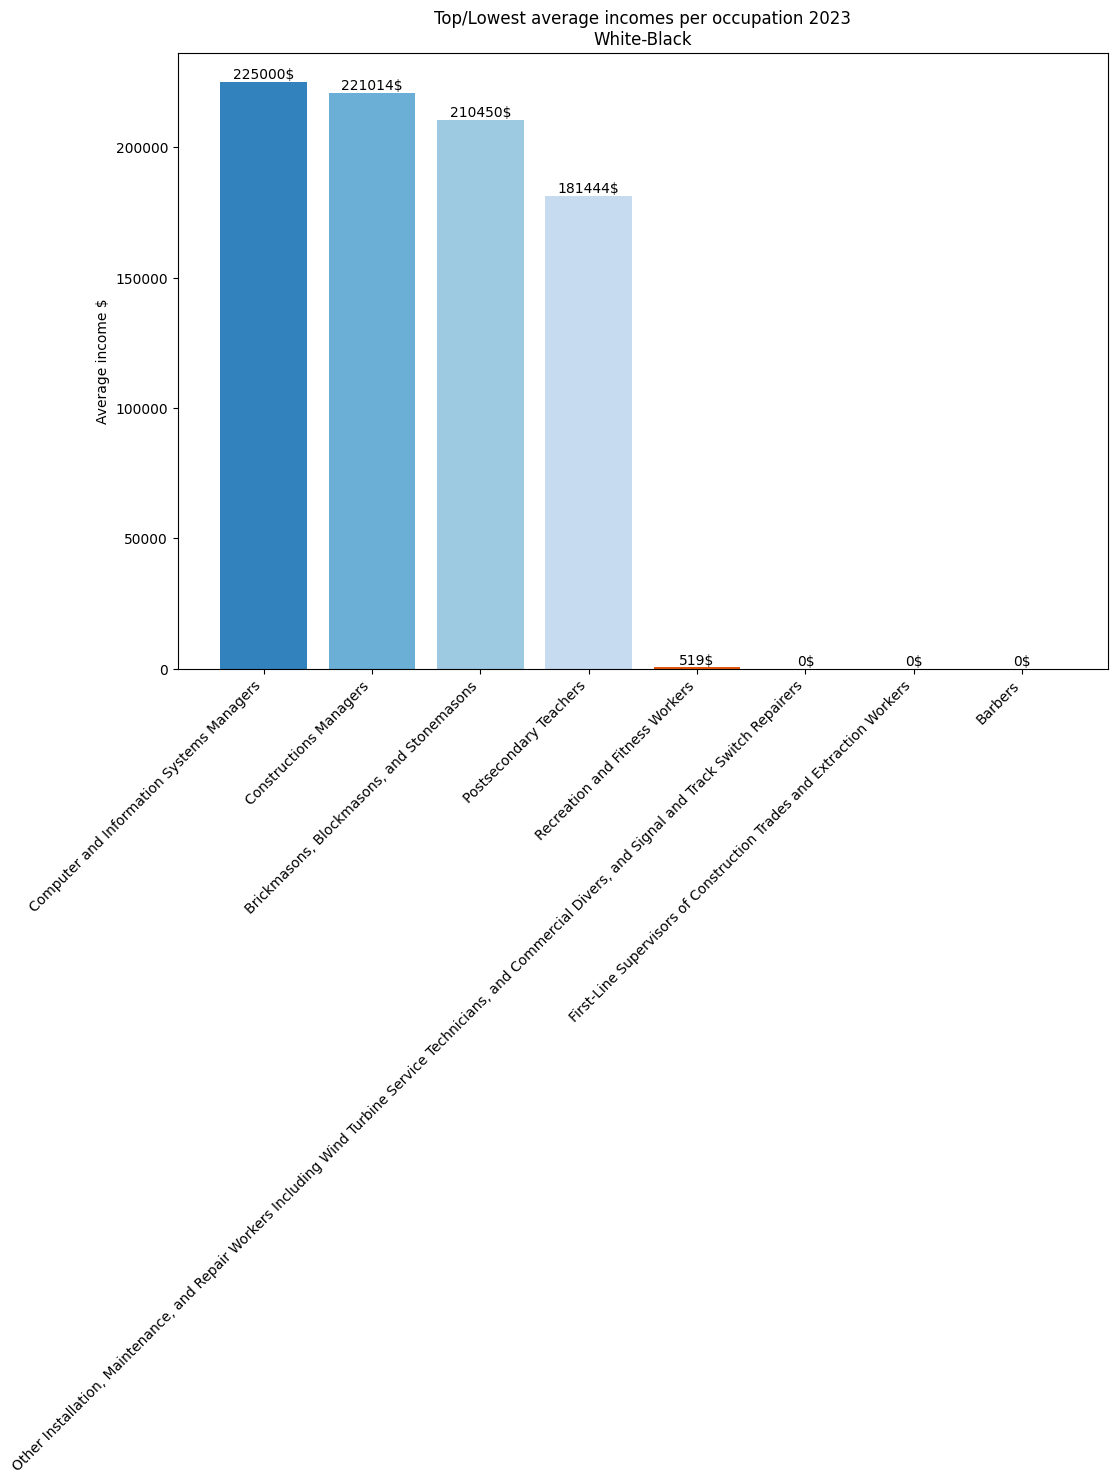

In [60]:
for r in top_5_races:
    print(r)
    # select only entries from race r
    avg_income_occ_r = avg_income_occ[avg_income_occ['RACE'] == r]

    # plot average income per citizenship for race r
    plot_avg_income_occupation(avg_income_occ_r, 2023, r)

----
## Income per occupation category/occupation

In [131]:
income_occ_cat = data_df[['YEAR', 'RACE', 'Category', 'INCWAGE', 'ASECWT', 'OCC2010', 'OCC10LY']]
income_occ_cat = income_occ_cat[income_occ_cat['OCC2010'] == income_occ_cat['OCC10LY']]
income_occ_cat_23 = income_occ_cat[income_occ_cat['YEAR'] == 2023]

In [132]:
income_occ_cat_23.groupby('Category').apply(weighed_avg_income, 'INCWAGE', 'ASECWT').reset_index().rename(columns={0:'INCWAGE'}).sort_values(by = 'INCWAGE')

,Category,INCWAGE
19,PERSONAL CARE AND SERVICE,27775.974313
2,BUILDING AND GROUNDS CLEANING AND MAINTENANCE,30965.444196
11,FOOD PREPARATION AND SERVING,31030.150969
9,"FARMING, FISHING, AND FORESTRY",36757.603299
13,HEALTHCARE SUPPORT,37678.369222
18,OFFICE AND ADMINISTRATIVE SUPPORT,47376.986447
24,TRANSPORTATION AND MATERIAL MOVING,48092.697799
6,CONSTRUCTION,48760.507652
20,PRODUCTION,50871.100813
4,COMMUNITY AND SOCIAL SERVICES,52996.720268
